# **ASSIGNMENT 17** #

## ***SALARY*** ##

Files : SalaryData_Train.csv; SalaryData_Test.csv

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#from dataprep.eda import plot, create_report
import scipy.stats as stat
from collections import Counter
#import dataprep
from sklearn.svm import SVC
from sklearn import tree, preprocessing, metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
#from dataprep.eda import plot, plot_correlation, plot_missing, create_report
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report, roc_curve, roc_auc_score , recall_score , precision_score, f1_score

# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

### **Importing data from file SalaryData_Train.csv**

In [2]:
# Importing the data from the file 'SalaryData_Train.csv'
salary_train_data = pd.read_csv("SalaryData_Train.csv")
salary_train_data

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

### **Importing data from file SalaryData_Test.csv**

In [3]:
# Importing the data from the file 'SalaryData_Test.csv'
salary_test_data = pd.read_csv('SalaryData_Test.csv')
salary_test_data

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [4]:
# Merging Train and Test Data
salary_orig_data = pd.concat([salary_train_data, salary_test_data])
salary_orig_data.reset_index(inplace=True,drop=True)
salary_orig_data

age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
45216   33            Private   Bachelors           13        Never-married   
45217   39            Private   Bachelors           13             Divorced   
45218   38            Private   Bachelors           13   Married-civ-spouse   
45219   44            Private   Bachelors           13             Divorced   
45220   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0            Adm-clerical   Not-in-family                White     Male   
1         Exec-managerial         Husband                White     Male   
2       Handlers-cleaners   Not-in-family                White     Male   
3       Handlers-cleaners         Husband                Black     Male   
4          Prof-specialty            Wife                Black   Female   
...                   ...             ...                  ...      ...   
45216      Prof-specialty       Own-child                White     Male   
45217      Prof-specialty   Not-in-family                White   Female   
45218      Prof-specialty         Husband                White     Male   
45219        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
45220     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0             2174            0            40   United-States   <=50K  
1                0            0            13   United-States   <=50K  
2                0            0            40   United-States   <=50K  
3                0            0            40   United-States   <=50K  
4                0            0            40            Cuba   <=50K  
...            ...          ...           ...             ...     ...  
45216            0            0            40   United-States   <=50K  
45217            0            0            36   United-States   <=50K  
45218            0            0            50   United-States   <=50K  
45219         5455            0            40   United-States   <=50K  
45220            0            0            60   United-States    >50K  

[45221 rows x 14 columns]

### **EDA (Exploratory Data Analysis)** ###

In [5]:
salary_orig_data.shape

(45221, 14)

In [6]:
salary_orig_data.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

#### *Descriptive Analysis* ####

In [7]:
salary_orig_data.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  45221.000000  45221.000000  45221.000000  45221.000000  45221.000000
mean      38.548086     10.118463   1101.454700     88.548617     40.938038
std       13.217981      2.552909   7506.511295    404.838249     12.007640
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [8]:
salary_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


#### *Checking for missing values* ####

In [9]:
# check for missing values
salary_orig_data.isna().sum() # The result shows that there are no missing values

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

#### *Checking for Null Values* ####

In [10]:
# Checking to see if there are any null values
# We can get this information using salary_orig_data.info() option as well
salary_orig_data.isnull().sum() # The result shows that there are no null values

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
# Checking for Duplicate Values
salary_orig_data.duplicated()  # if any 2 rows has same values

0        False
1        False
2        False
3        False
4        False
         ...  
45216    False
45217    False
45218     True
45219    False
45220    False
Length: 45221, dtype: bool

In [12]:
# Count of duplicated rows
salary_orig_data[salary_orig_data.duplicated()].shape # We see that there are duplicates

(5982, 14)

In [13]:
# Print the duplicated rows. Since we have duplicates it will show us the record
salary_orig_data[salary_orig_data.duplicated()] # There are duplicates

age workclass      education  educationno        maritalstatus  \
326     33   Private      Bachelors           13   Married-civ-spouse   
364     27   Private      Bachelors           13        Never-married   
518     24   Private        HS-grad            9        Never-married   
525     24   Private        HS-grad            9        Never-married   
619     33   Private      Bachelors           13   Married-civ-spouse   
...    ...       ...            ...          ...                  ...   
45205   22   Private   Some-college           10        Never-married   
45210   32   Private        HS-grad            9   Married-civ-spouse   
45213   31   Private        HS-grad            9   Married-civ-spouse   
45214   25   Private        HS-grad            9        Never-married   
45218   38   Private      Bachelors           13   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
326       Exec-managerial         Husband   White     Male            0   
364          Craft-repair   Not-in-family   White     Male            0   
518     Handlers-cleaners       Unmarried   Black   Female            0   
525          Craft-repair       Own-child   White     Male            0   
619       Exec-managerial         Husband   White     Male            0   
...                   ...             ...     ...      ...          ...   
45205        Craft-repair       Own-child   White     Male            0   
45210   Handlers-cleaners         Husband   White     Male            0   
45213        Craft-repair         Husband   White     Male            0   
45214       Other-service       Own-child   White   Female            0   
45218      Prof-specialty         Husband   White     Male            0   

       capitalloss  hoursperweek          native  Salary  
326              0            40   United-States    >50K  
364              0            50   United-States   <=50K  
518              0            40   United-States   <=50K  
525              0            40   United-States   <=50K  
619              0            40   United-States    >50K  
...            ...           ...             ...     ...  
45205            0            40   United-States   <=50K  
45210            0            40   United-States   <=50K  
45213            0            40   United-States   <=50K  
45214            0            40   United-States   <=50K  
45218            0            50   United-States   <=50K  

[5982 rows x 14 columns]

In [14]:
salary_orig_data.shape

(45221, 14)

In [15]:
# Creating another DataFrame 'ff_data', which is a duplicate of ff_orig_data
salary_data = salary_orig_data.copy()

In [16]:
# Dropping the duplicates as well as resetting the index
salary_data = salary_data.drop_duplicates().reset_index(drop=True) # Removing the duplicates by retraining on the first record

In [17]:
salary_data.shape

(39239, 14)

In [18]:
# Print the duplicated rows. Since we do not have duplicates it will show us the same
salary_data[salary_data.duplicated()] # There are no duplicates now

Empty DataFrame
Columns: [age, workclass, education, educationno, maritalstatus, occupation, relationship, race, sex, capitalgain, capitalloss, hoursperweek, native, Salary]
Index: []

#### *Checking the data structure* ####

In [19]:
# Data Structure
print(type(salary_data))
salary_data.shape

<class 'pandas.core.frame.DataFrame'>


(39239, 14)

In [20]:
# Checking data types
salary_data.dtypes # check data types of all variables

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [21]:
# The Unique Titles in 'salary_orig_data' are:
for col in salary_data.columns:
  print(f"The count of unique titles in {col} are {len(salary_data[col].unique())}\n")
  print(f"The unique titles in {col} are -\n {salary_data[col].unique()}\n")

The count of unique titles in age are 74

The unique titles in age are -
 [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]

The count of unique titles in workclass are 7

The unique titles in workclass are -
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

The count of unique titles in education are 16

The unique titles in education are -
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

The count of unique titles in educationno are 16

The unique titles in educationno are -
 [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]

The count of unique titles in maritalstatus are 7

The unique titles in maritalstatus are -

#### *Rename Columns* ####

In [22]:
# Renaming column names
salary_data.rename(columns = {'age':'AGE','workclass':'WCLASS','education':'EDU','educationno':'EDU_NO','maritalstatus':'MS','occupation':'OCCUP','relationship':'REL','race':'RACE','sex':'SEX','capitalgain':'CAP_GAIN','capitalloss':'CAP_LOSS','hoursperweek':'HPW','native':'NATIVE','Salary':'SAL'}, inplace = True)
salary_data.head()

AGE             WCLASS         EDU  EDU_NO                   MS  \
0   39          State-gov   Bachelors      13        Never-married   
1   50   Self-emp-not-inc   Bachelors      13   Married-civ-spouse   
2   38            Private     HS-grad       9             Divorced   
3   53            Private        11th       7   Married-civ-spouse   
4   28            Private   Bachelors      13   Married-civ-spouse   

                OCCUP             REL    RACE      SEX  CAP_GAIN  CAP_LOSS  \
0        Adm-clerical   Not-in-family   White     Male      2174         0   
1     Exec-managerial         Husband   White     Male         0         0   
2   Handlers-cleaners   Not-in-family   White     Male         0         0   
3   Handlers-cleaners         Husband   Black     Male         0         0   
4      Prof-specialty            Wife   Black   Female         0         0   

   HPW          NATIVE     SAL  
0   40   United-States   <=50K  
1   13   United-States   <=50K  
2   40   United-States   <=50K  
3   40   United-States   <=50K  
4   40            Cuba   <=50K

#### *Segregating the columns into Numeric and Non-Numeric* ####

In [23]:
categorical_cols = []
numeric_cols = []
for columns in salary_data.columns:
      if salary_data[columns].dtypes == 'object':
            categorical_cols.append(columns)
            print(f"There are {len(salary_data[columns].unique())} unique values in the categorical column name '{columns}'")
      elif salary_data[columns].dtypes == 'int64':
            numeric_cols.append(columns)

print(f"\nThere are {len(categorical_cols)} Categorical Columns: ",categorical_cols,"\n")
print(f"There are {len(numeric_cols)} Numeric Columns: ",numeric_cols,"\n")

There are 7 unique values in the categorical column name 'WCLASS'
There are 16 unique values in the categorical column name 'EDU'
There are 7 unique values in the categorical column name 'MS'
There are 14 unique values in the categorical column name 'OCCUP'
There are 6 unique values in the categorical column name 'REL'
There are 5 unique values in the categorical column name 'RACE'
There are 2 unique values in the categorical column name 'SEX'
There are 40 unique values in the categorical column name 'NATIVE'
There are 2 unique values in the categorical column name 'SAL'

There are 9 Categorical Columns:  ['WCLASS', 'EDU', 'MS', 'OCCUP', 'REL', 'RACE', 'SEX', 'NATIVE', 'SAL'] 

There are 5 Numeric Columns:  ['AGE', 'EDU_NO', 'CAP_GAIN', 'CAP_LOSS', 'HPW'] 



In [24]:
# Decide which categorical variables you want to use in model
for columns in salary_data.columns:
    if salary_data[columns].dtypes == 'object':
        unique_count = len(salary_data[columns].unique())
        print("\n------------------------------------------\n")
        print(f"There are {unique_count} unique columns in the column name '{columns}'")
        print("\n", salary_data[columns].value_counts(),"\n")


------------------------------------------

There are 7 unique columns in the column name 'WCLASS'

 WCLASS
 Private             27716
 Self-emp-not-inc     3669
 Local-gov            2975
 State-gov            1892
 Self-emp-inc         1595
 Federal-gov          1371
 Without-pay            21
Name: count, dtype: int64 


------------------------------------------

There are 16 unique columns in the column name 'EDU'

 EDU
 HS-grad         12003
 Some-college     8456
 Bachelors        6522
 Masters          2357
 Assoc-voc        1859
 Assoc-acdm       1470
 11th             1422
 10th             1136
 7th-8th           801
 Prof-school       764
 9th               658
 12th              540
 Doctorate         526
 5th-6th           438
 1st-4th           217
 Preschool          70
Name: count, dtype: int64 


------------------------------------------

There are 7 unique columns in the column name 'MS'

 MS
 Married-civ-spouse       17947
 Never-married            12168
 Divorced

In [25]:
salary_data[numeric_cols].head()

AGE  EDU_NO  CAP_GAIN  CAP_LOSS  HPW
0   39      13      2174         0   40
1   50      13         0         0   13
2   38       9         0         0   40
3   53       7         0         0   40
4   28      13         0         0   40

In [26]:
salary_data[categorical_cols].head()

WCLASS         EDU                   MS               OCCUP  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

              REL    RACE      SEX          NATIVE     SAL  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

In [27]:
cat_sal_data = pd.DataFrame()
num_sal_data = pd.DataFrame()

cat_sal_data = salary_data[categorical_cols]
num_sal_data = salary_data[numeric_cols]

In [28]:
cat_sal_data.head()

WCLASS         EDU                   MS               OCCUP  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

              REL    RACE      SEX          NATIVE     SAL  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

In [29]:
num_sal_data.head()

AGE  EDU_NO  CAP_GAIN  CAP_LOSS  HPW
0   39      13      2174         0   40
1   50      13         0         0   13
2   38       9         0         0   40
3   53       7         0         0   40
4   28      13         0         0   40

#### **Visualizations** ####

#### ***Numerical Features*** ####

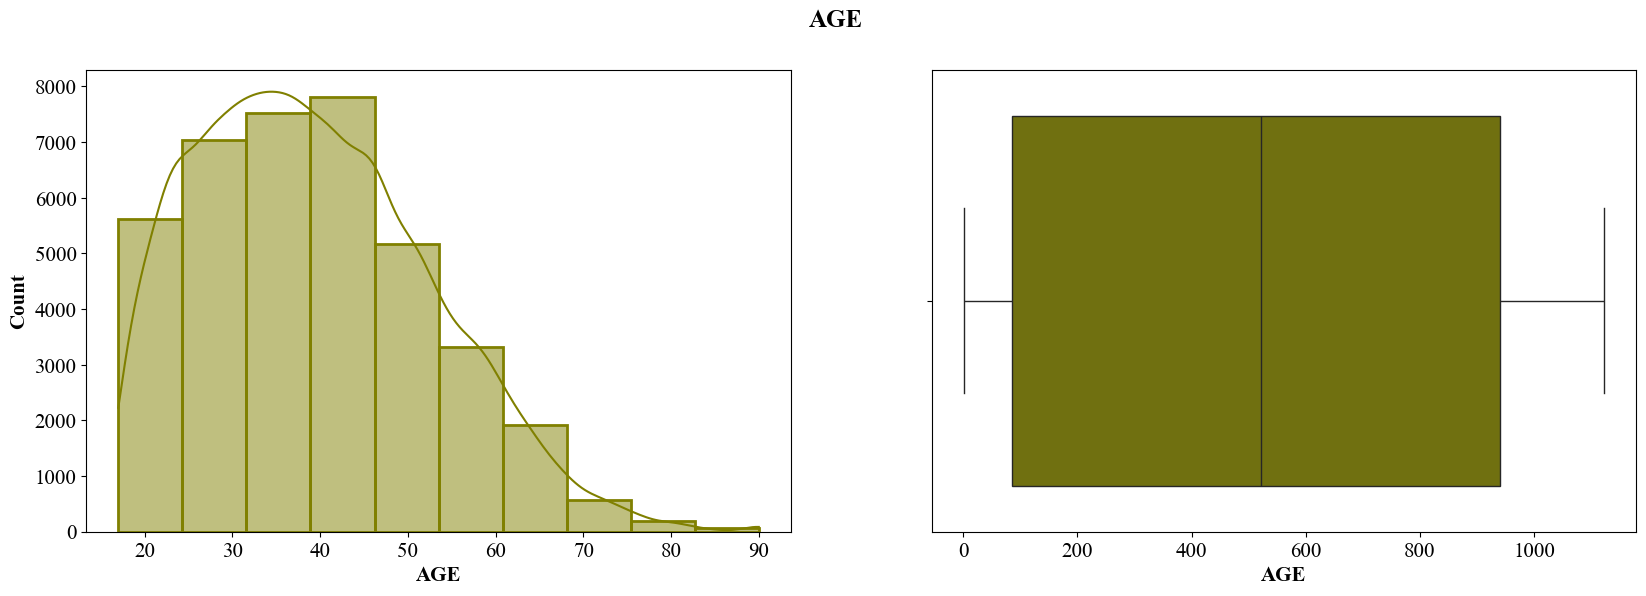

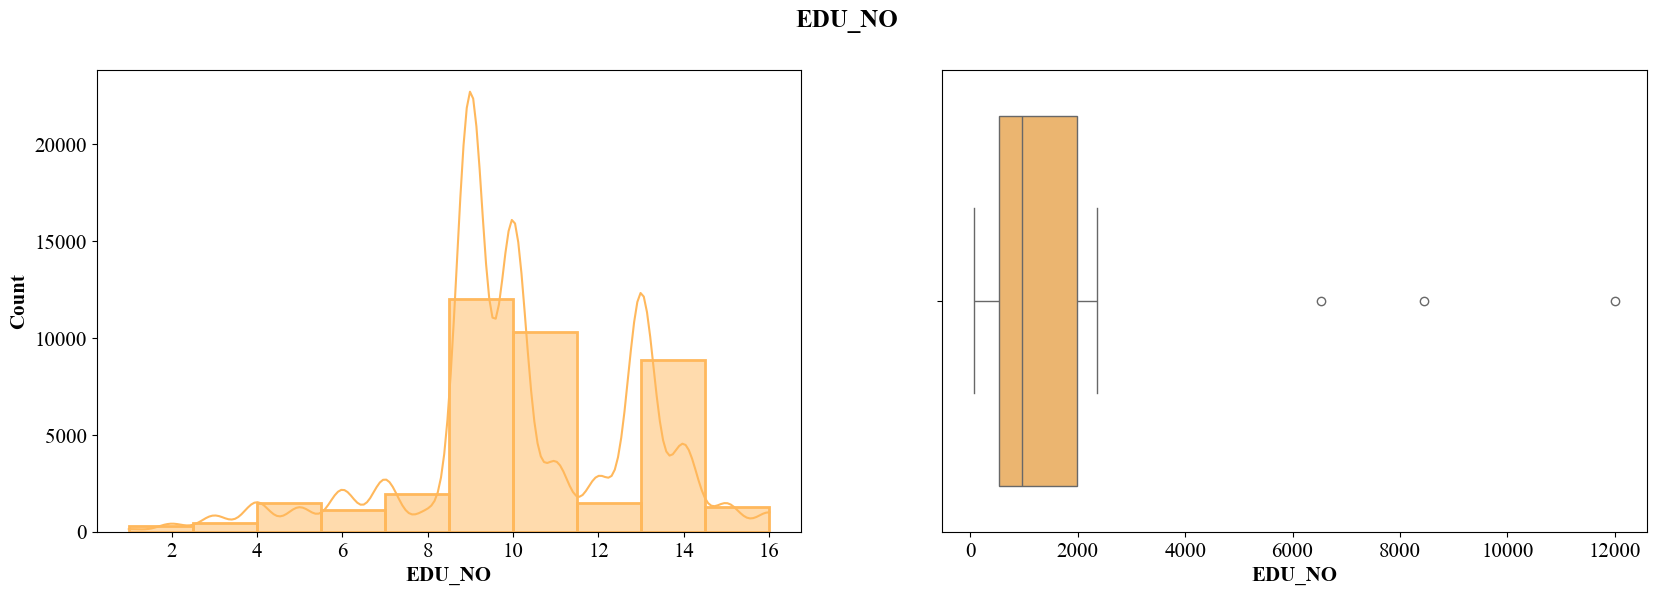

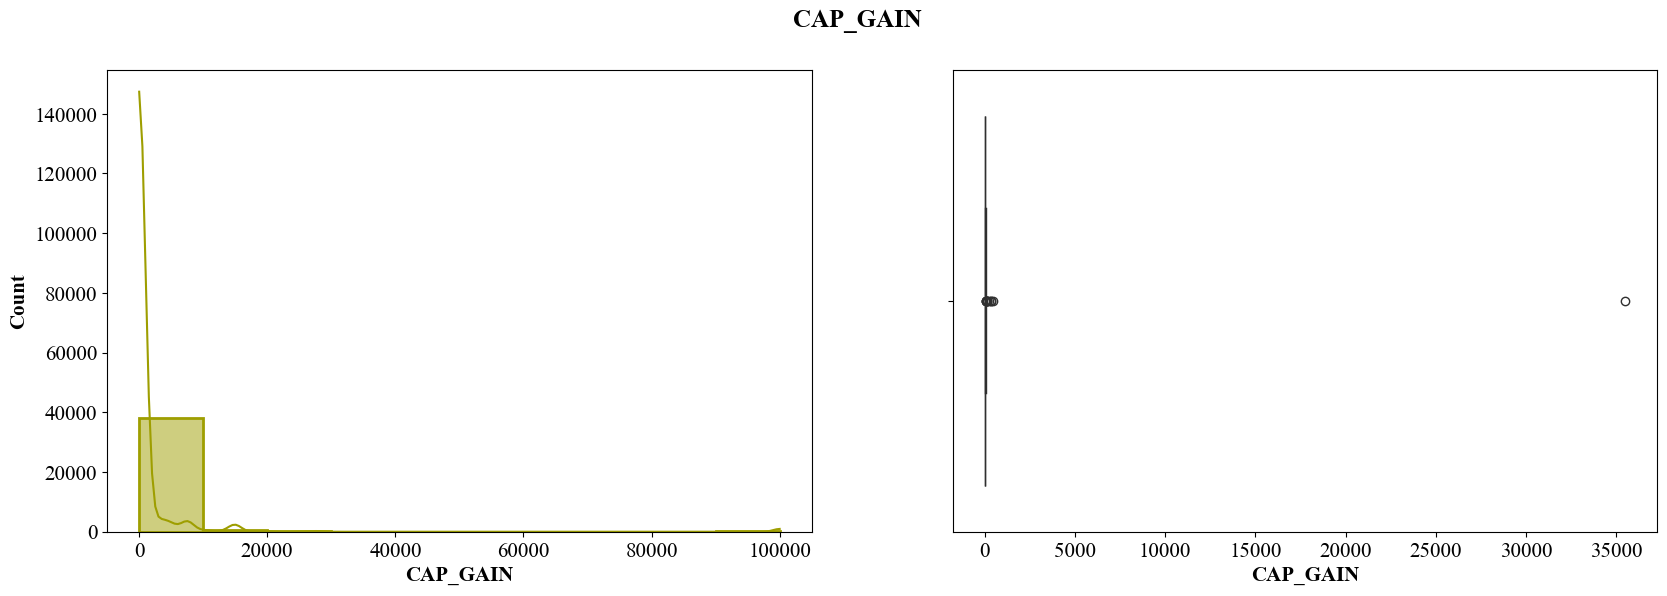

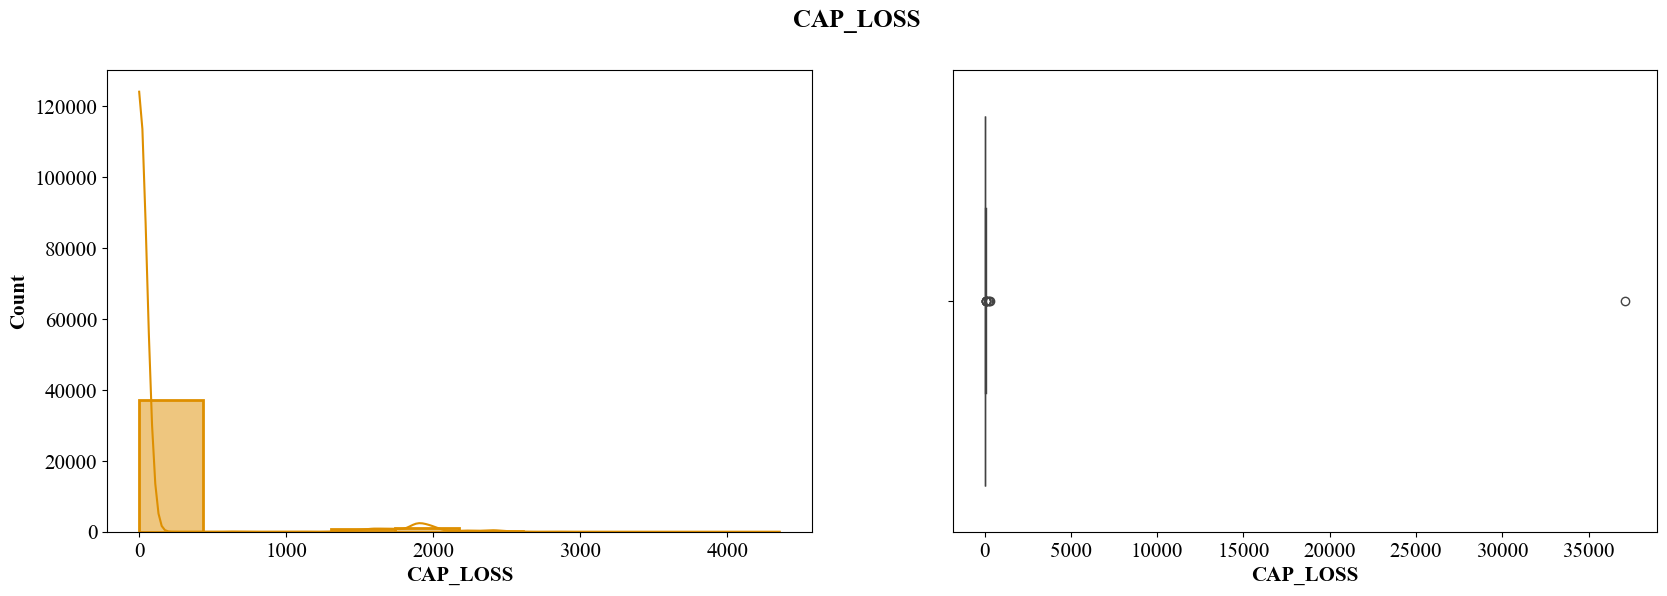

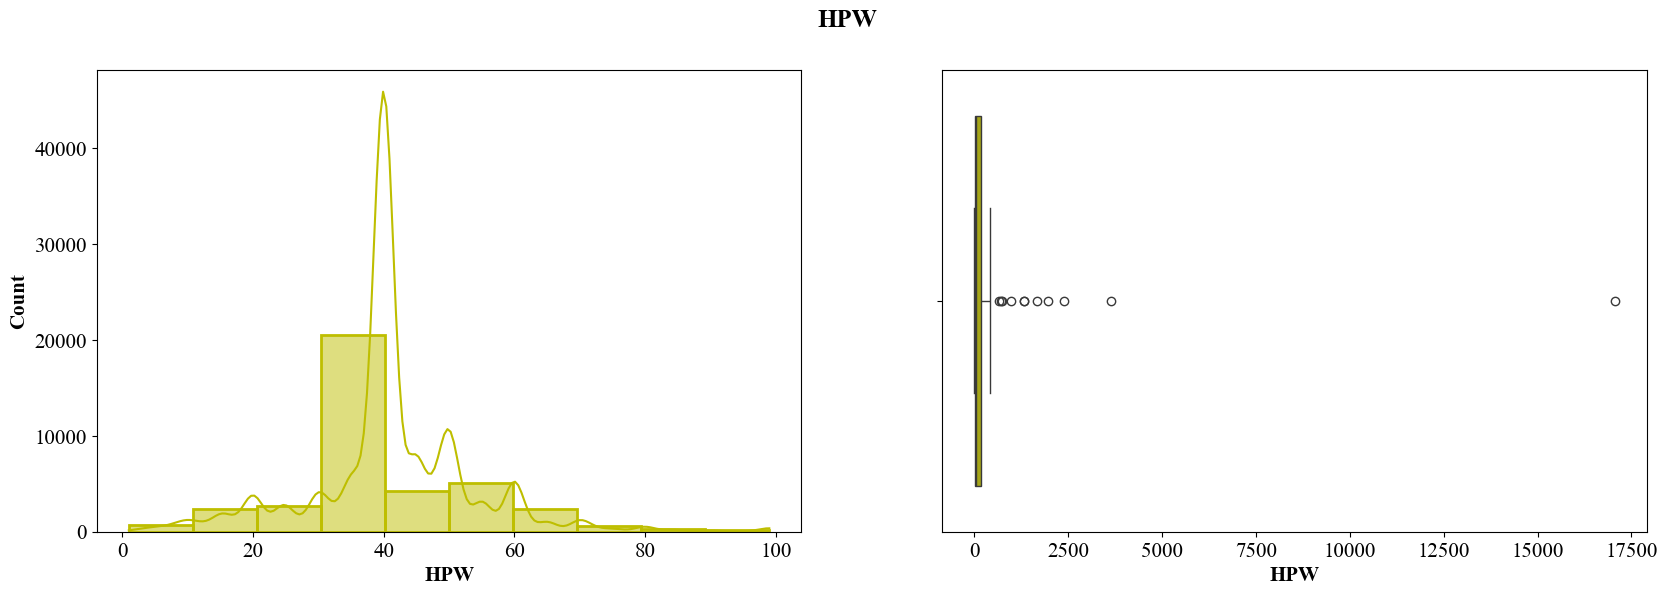

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.setp(plot.get_yticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.xlabel(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.ylabel("Count", weight='bold', fontfamily = "Times New Roman", size = '15')

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.xlabel(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.xticks(fontfamily = "Times New Roman", size=15)
    plt.suptitle(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '18')

    #bp.set_xlabel("X Label",fontsize=30)

for cols in num_sal_data:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(num_sal_data,cols)

There are  too many outliers and we cannot remove them as they are important for the model building.

#### ***Categorical Features*** ####

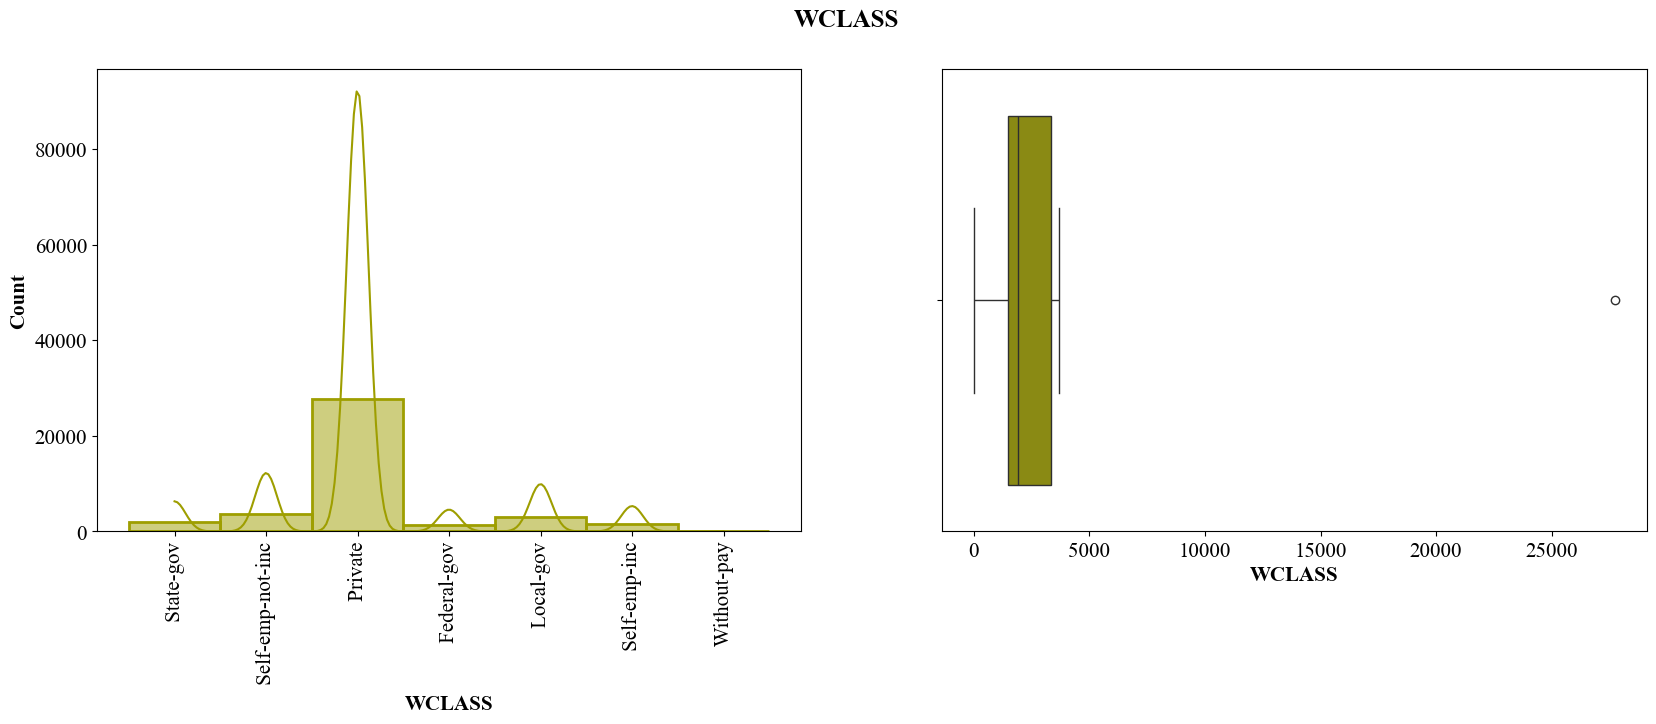

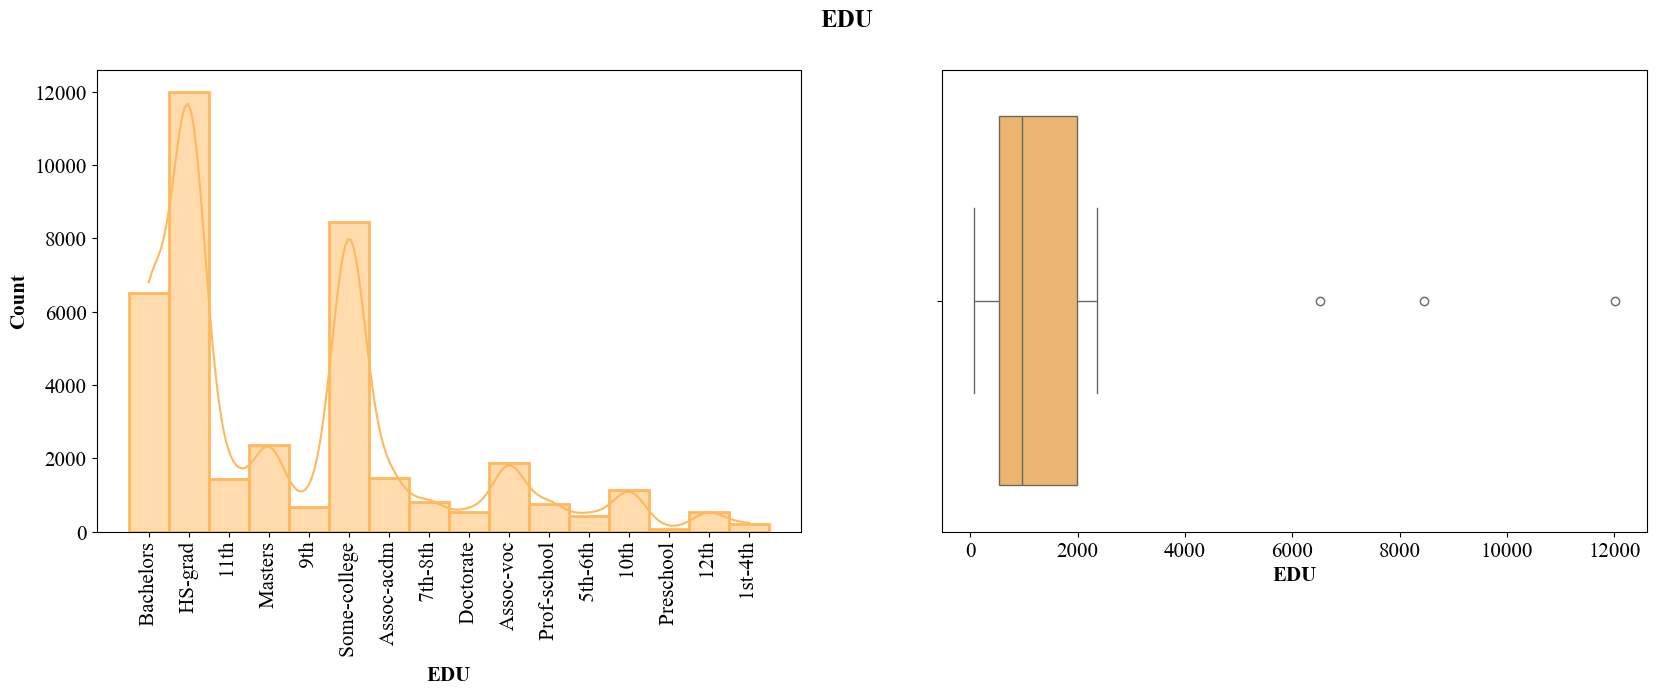

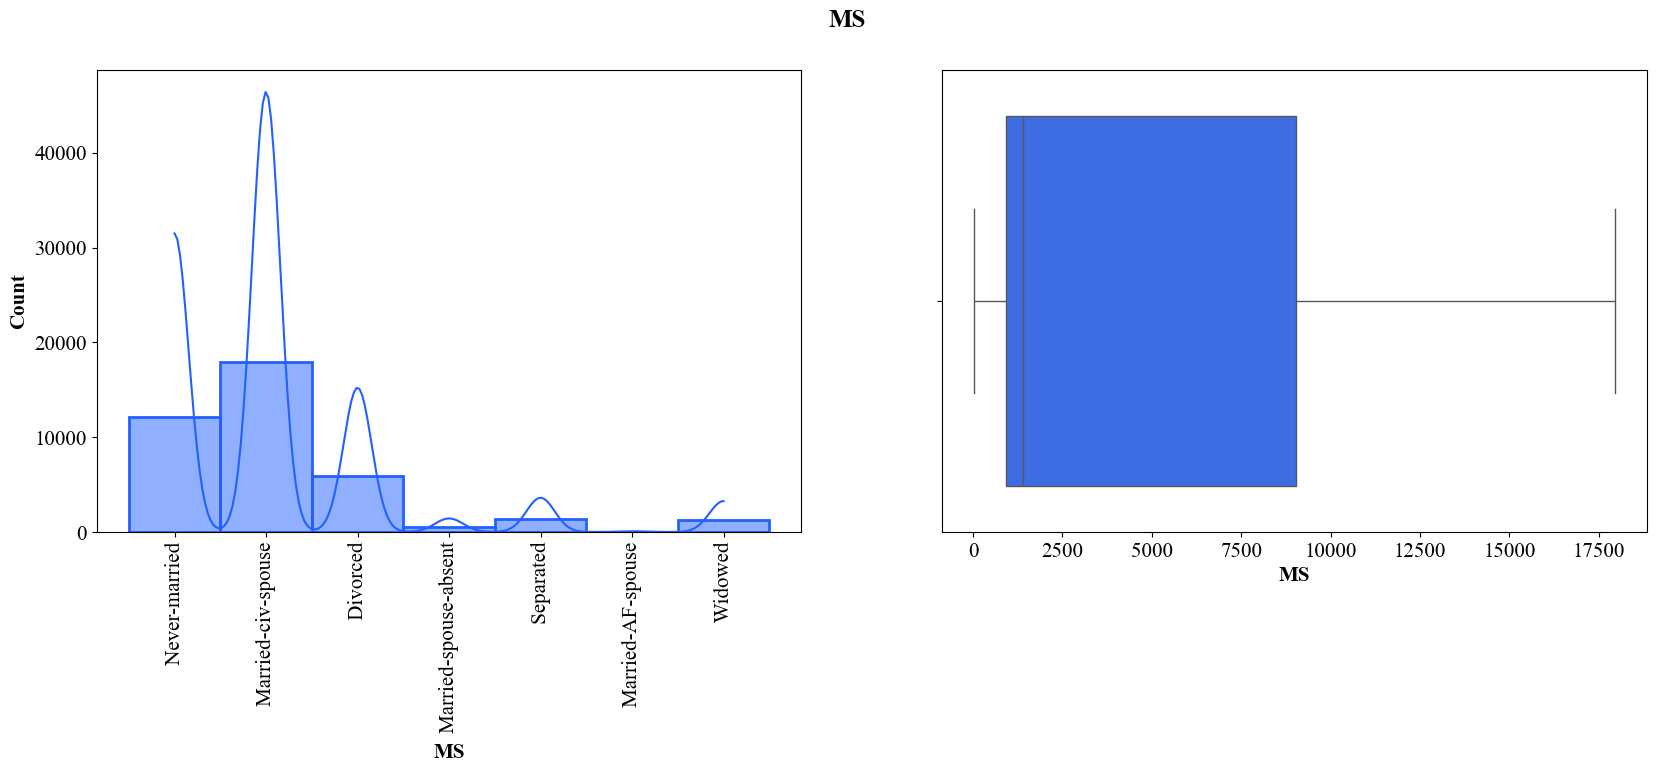

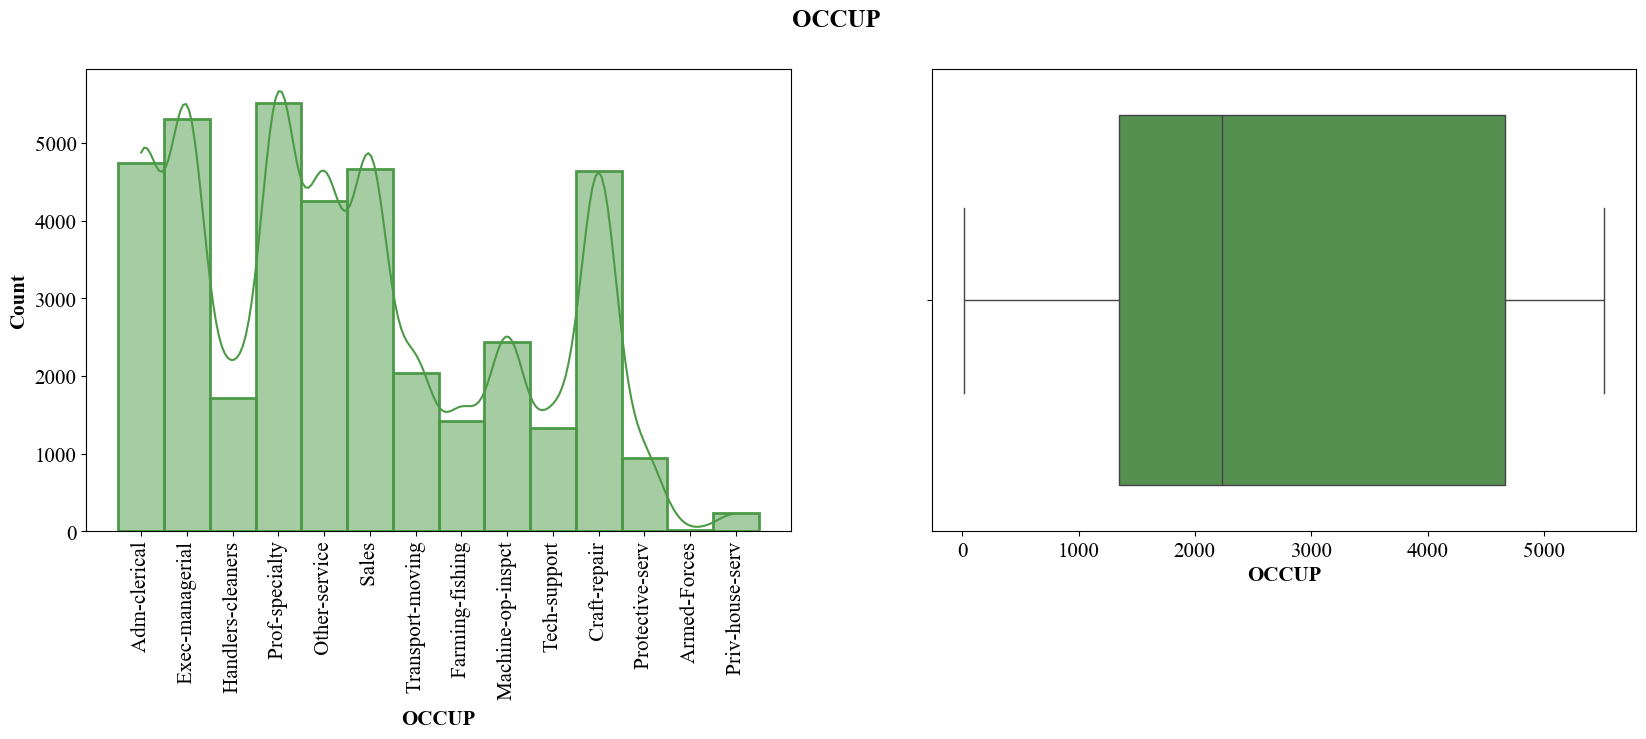

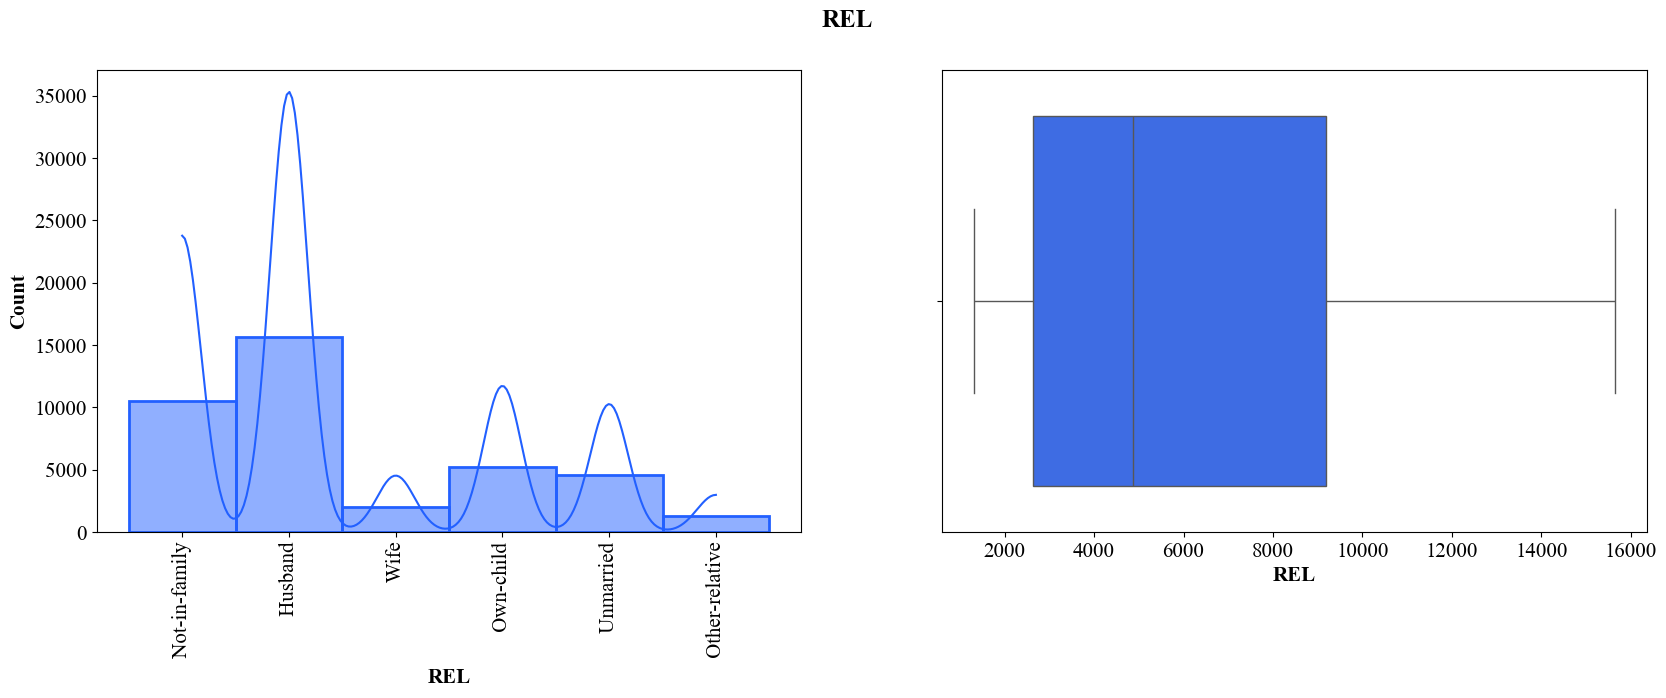

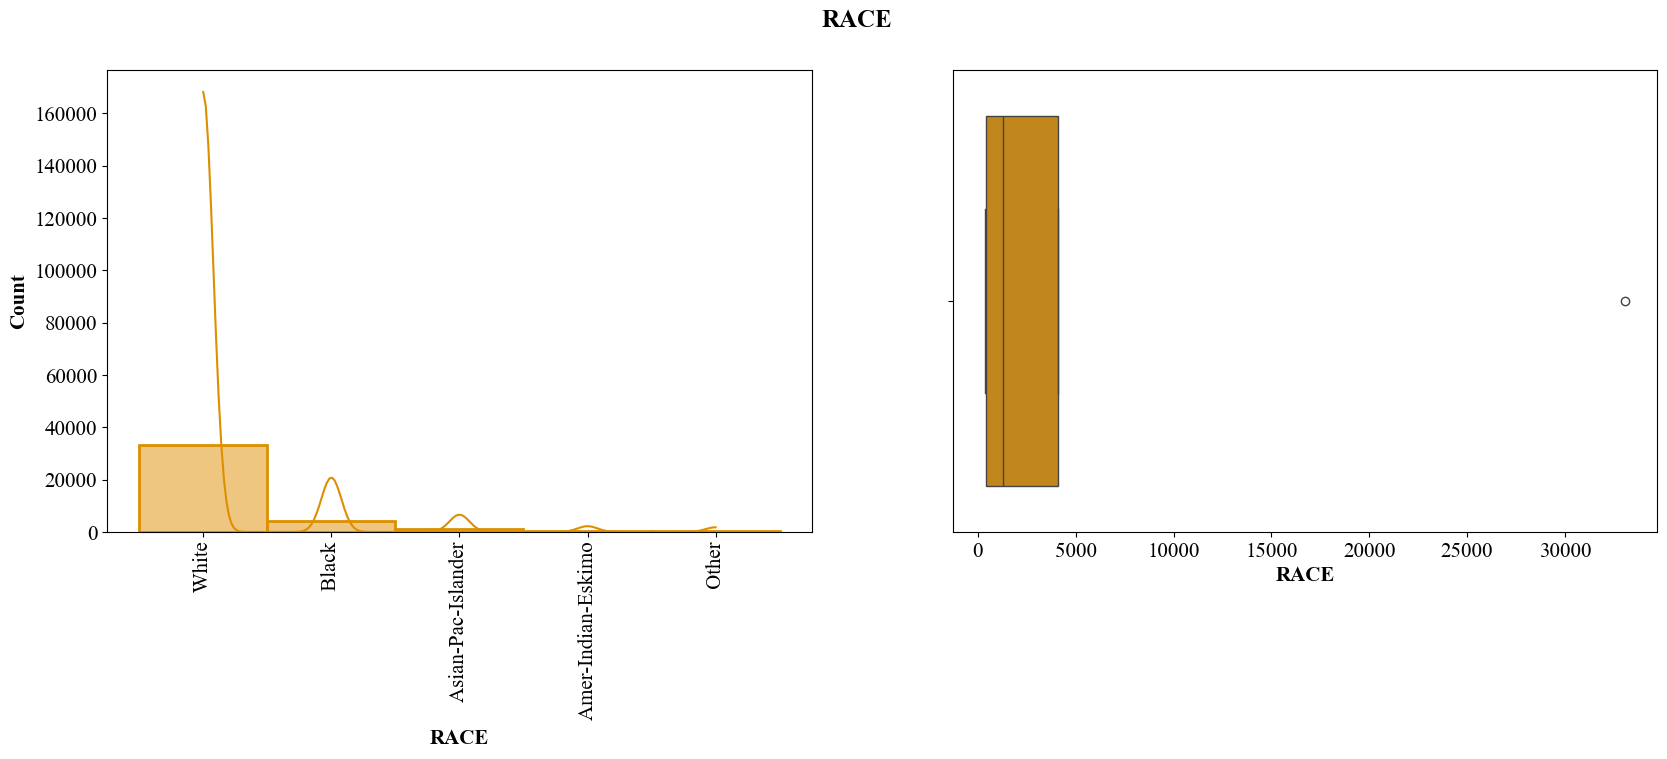

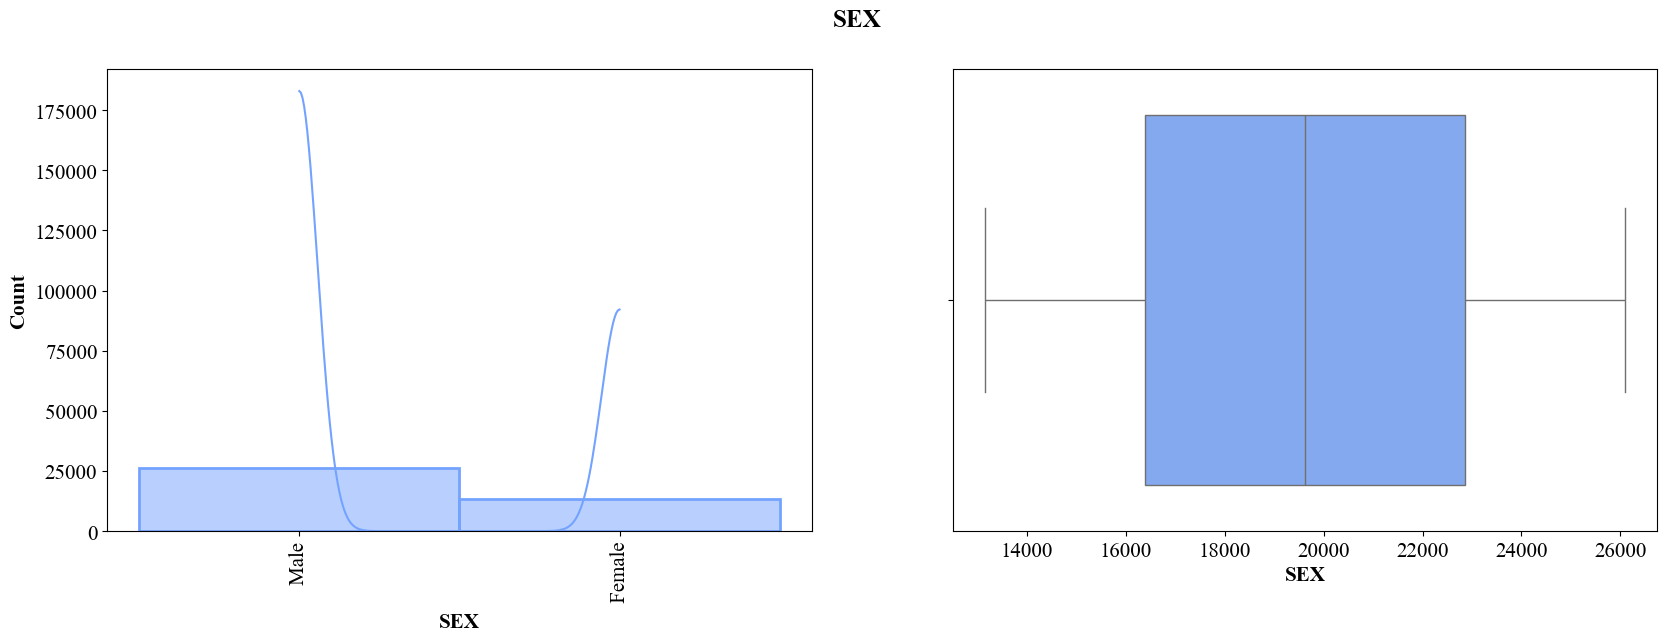

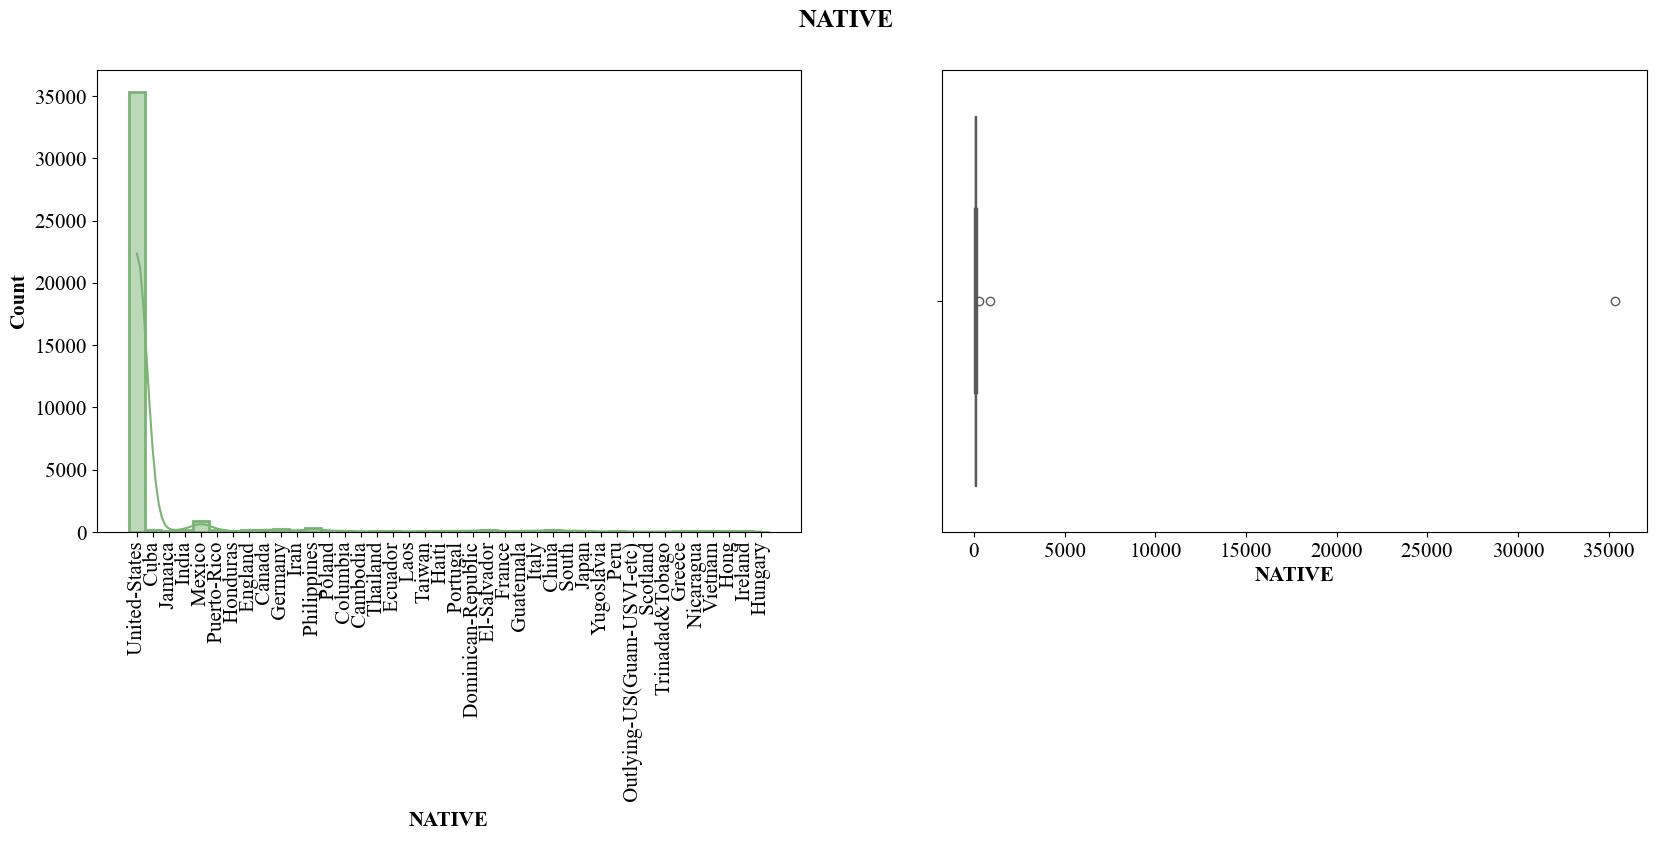

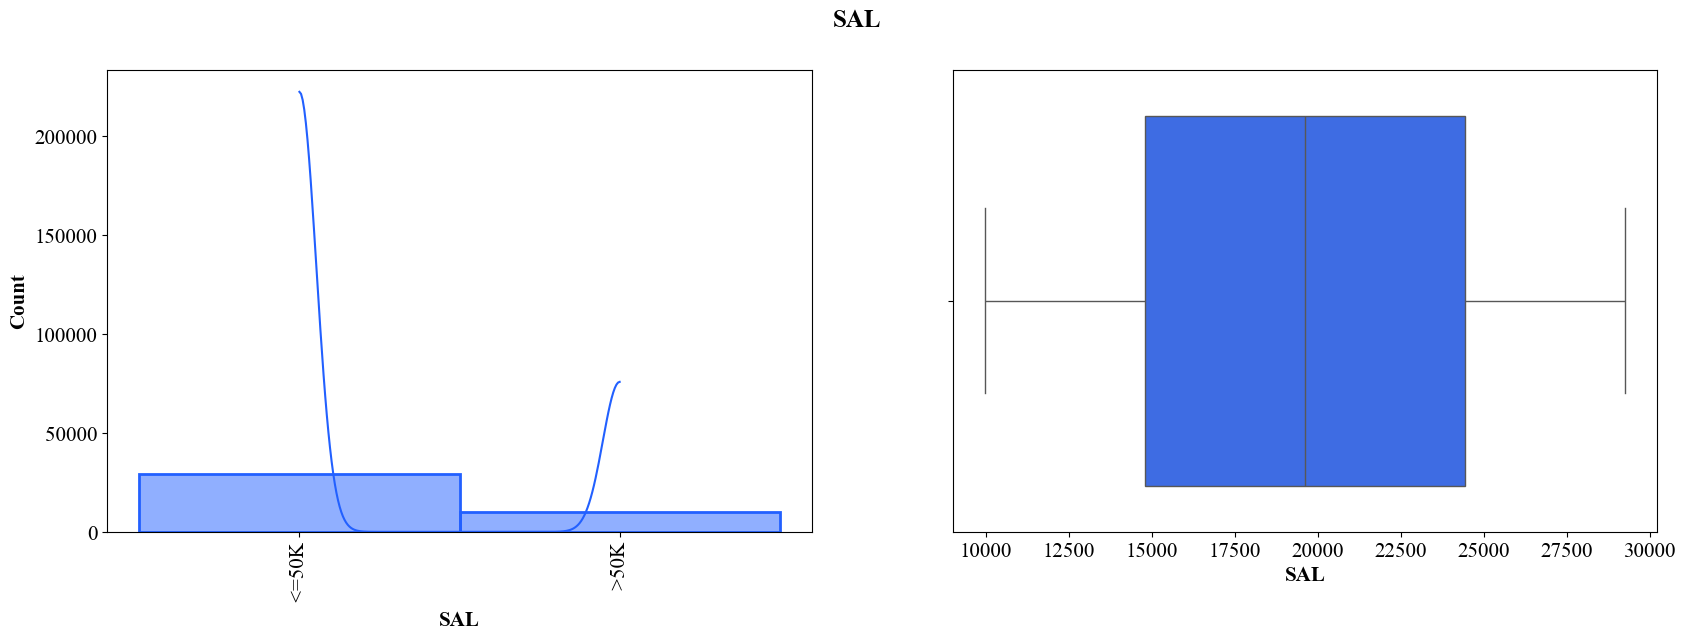

In [31]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_yticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.xlabel(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.ylabel("Count", weight='bold', fontfamily = "Times New Roman", size = '15')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)
    plt.setp(plot.get_xticklabels(), rotation=90, fontfamily = "Times New Roman", size = '15')
    plt.xlabel(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.xticks(fontfamily = "Times New Roman", size=15)
    plt.suptitle(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '18')

    #bp.set_xlabel("X Label",fontsize=30)

for cols in cat_sal_data:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(cat_sal_data,cols)

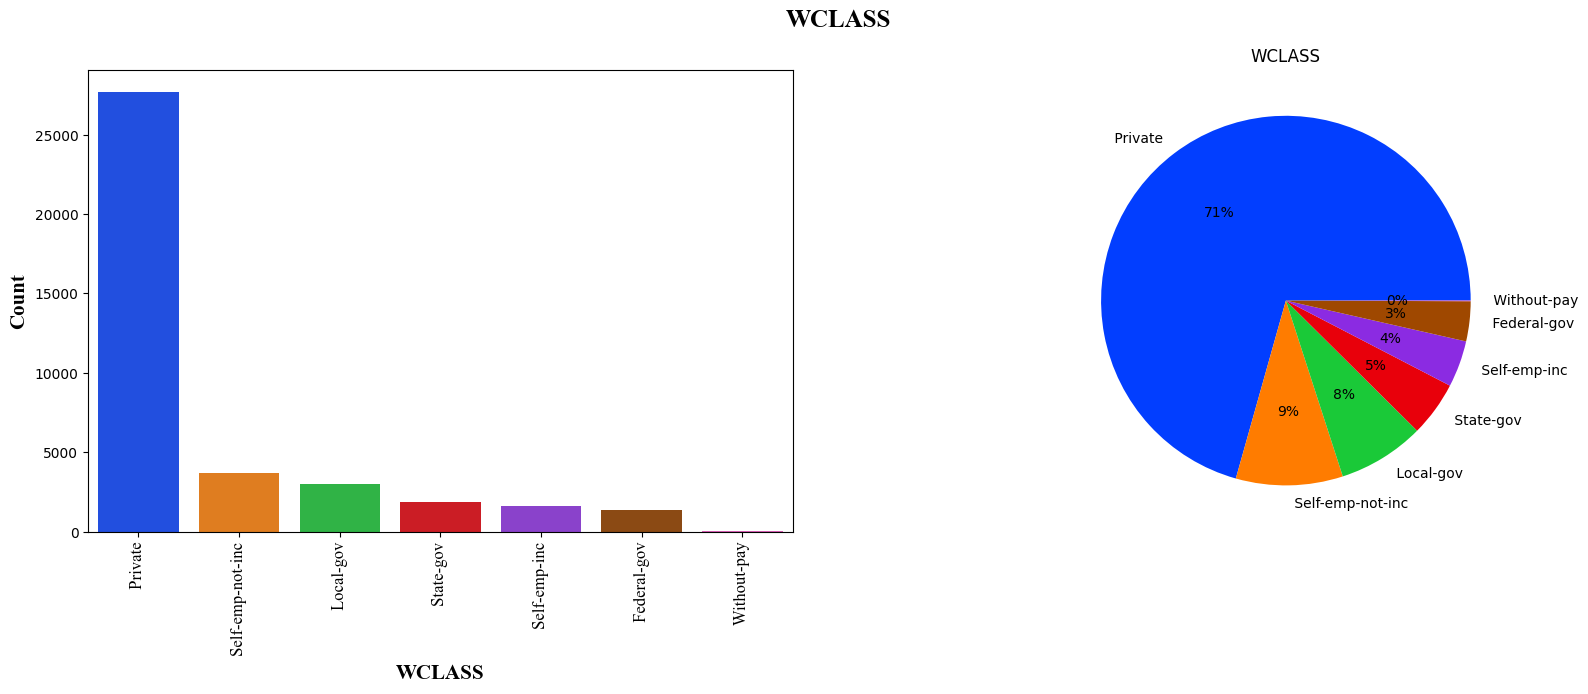

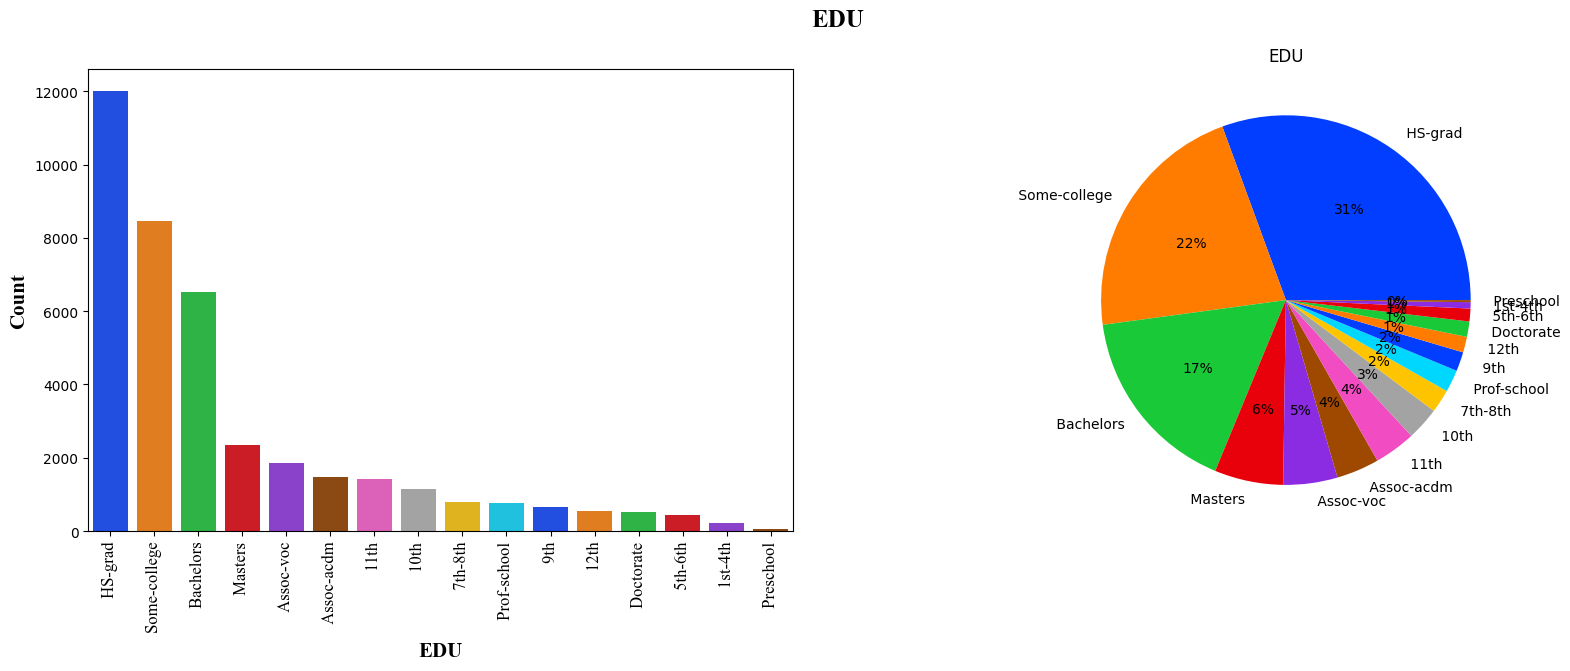

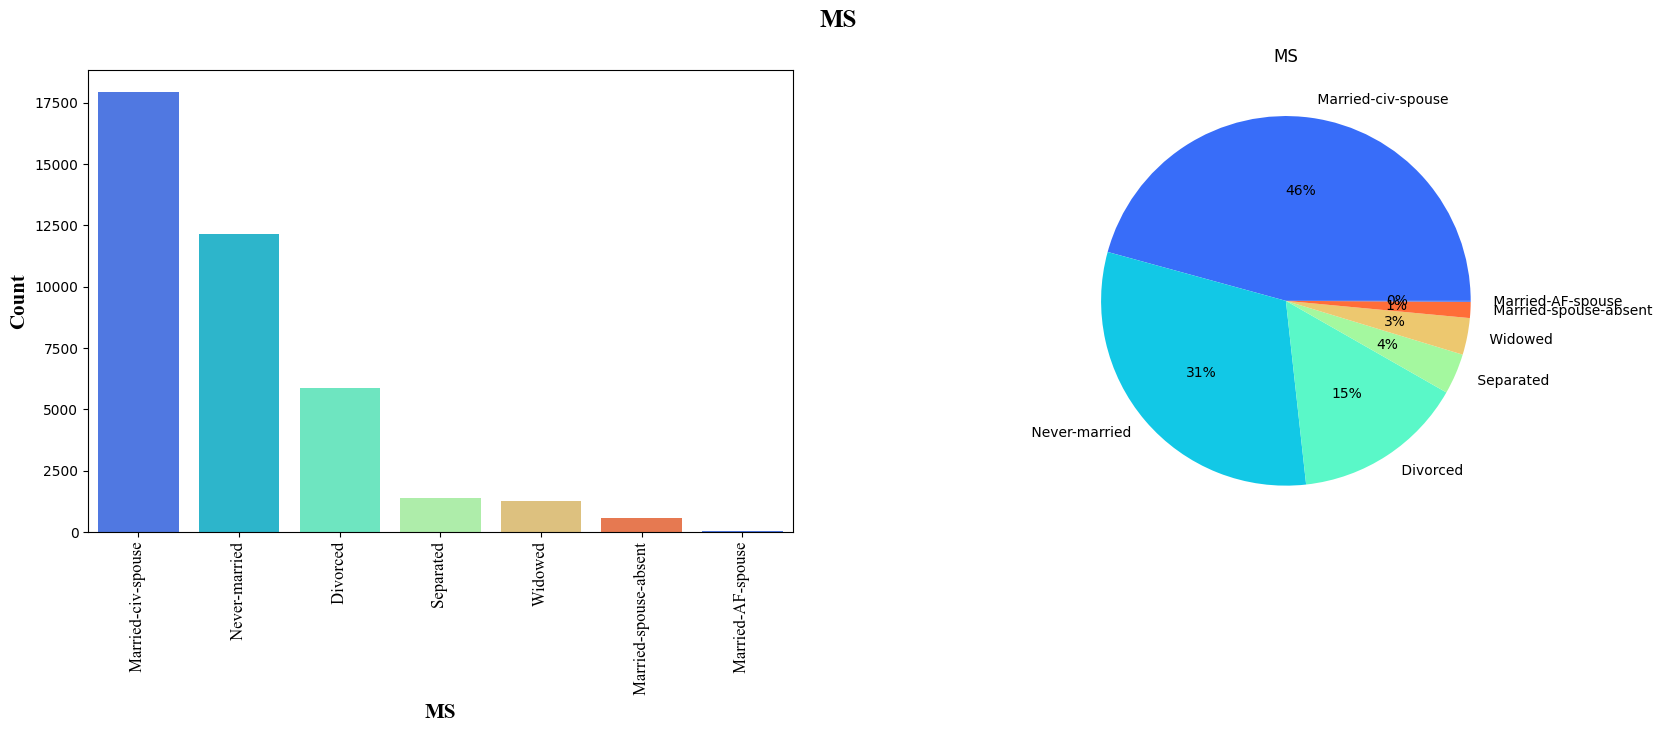

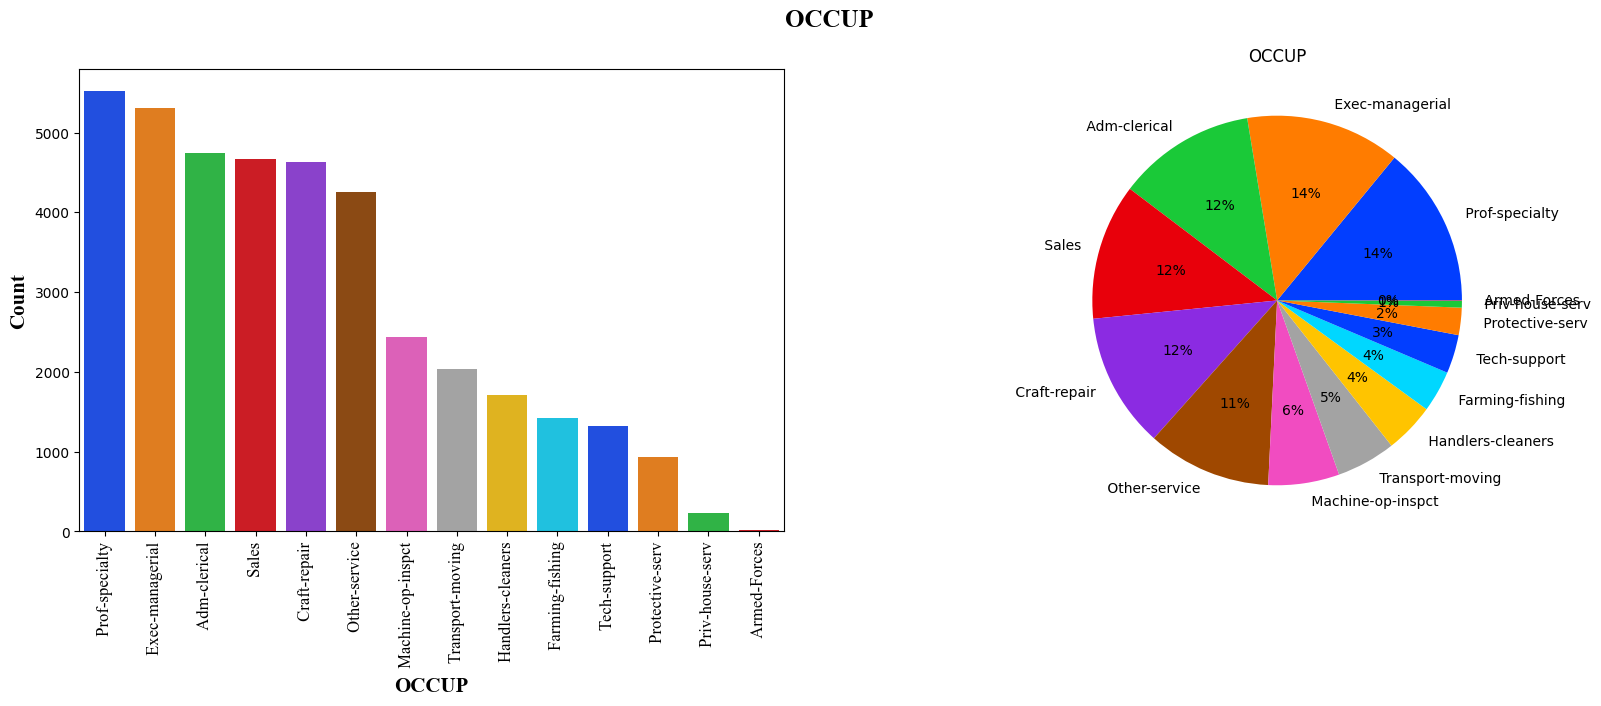

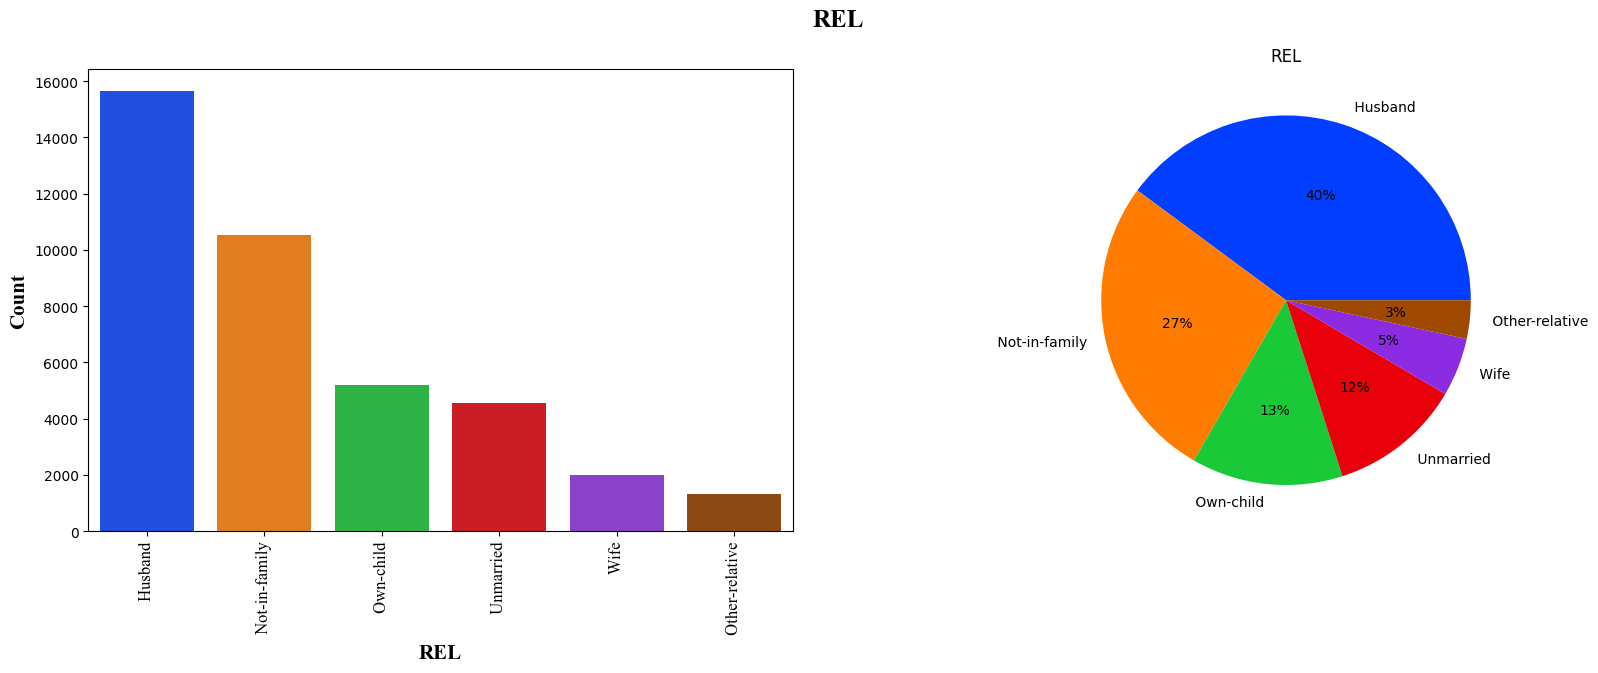

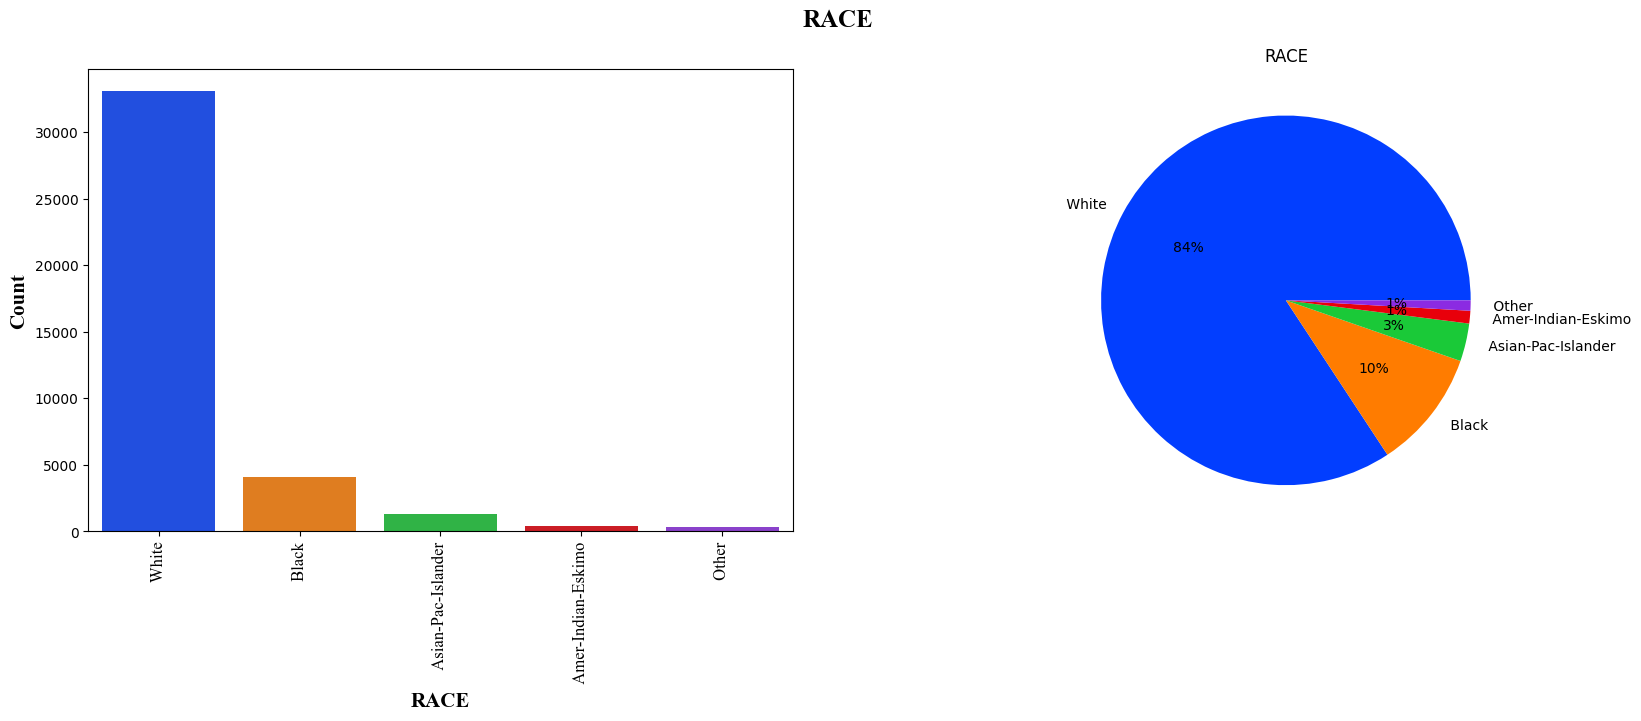

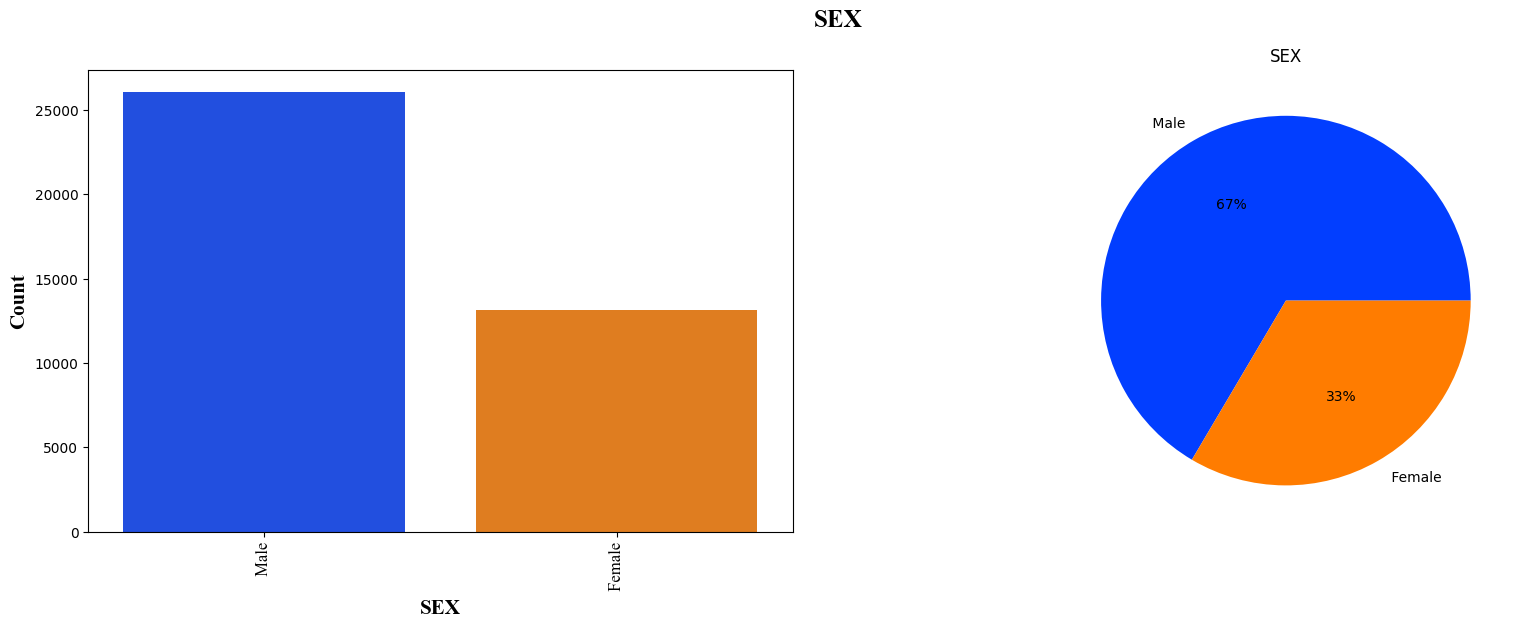

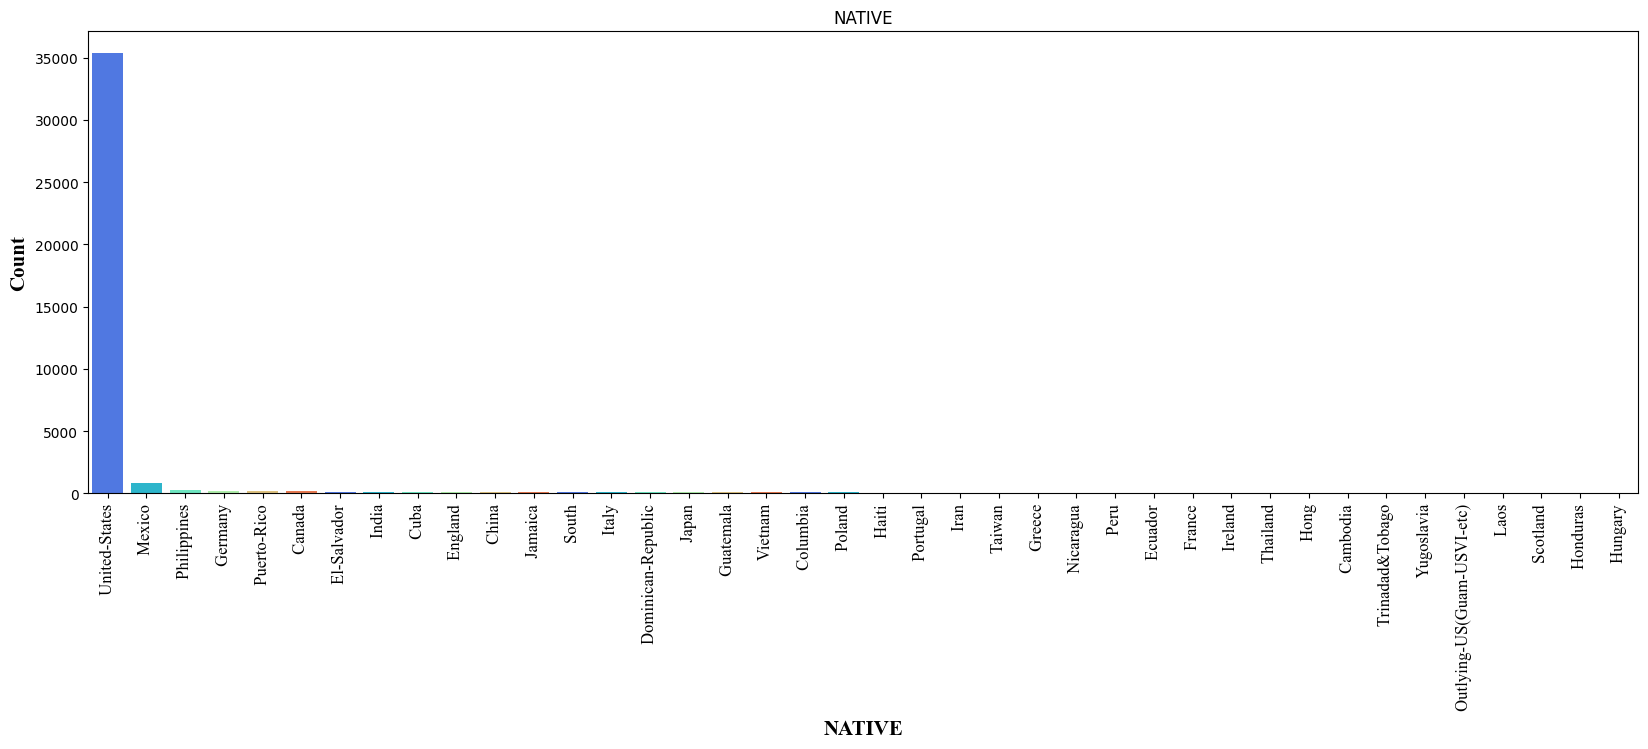

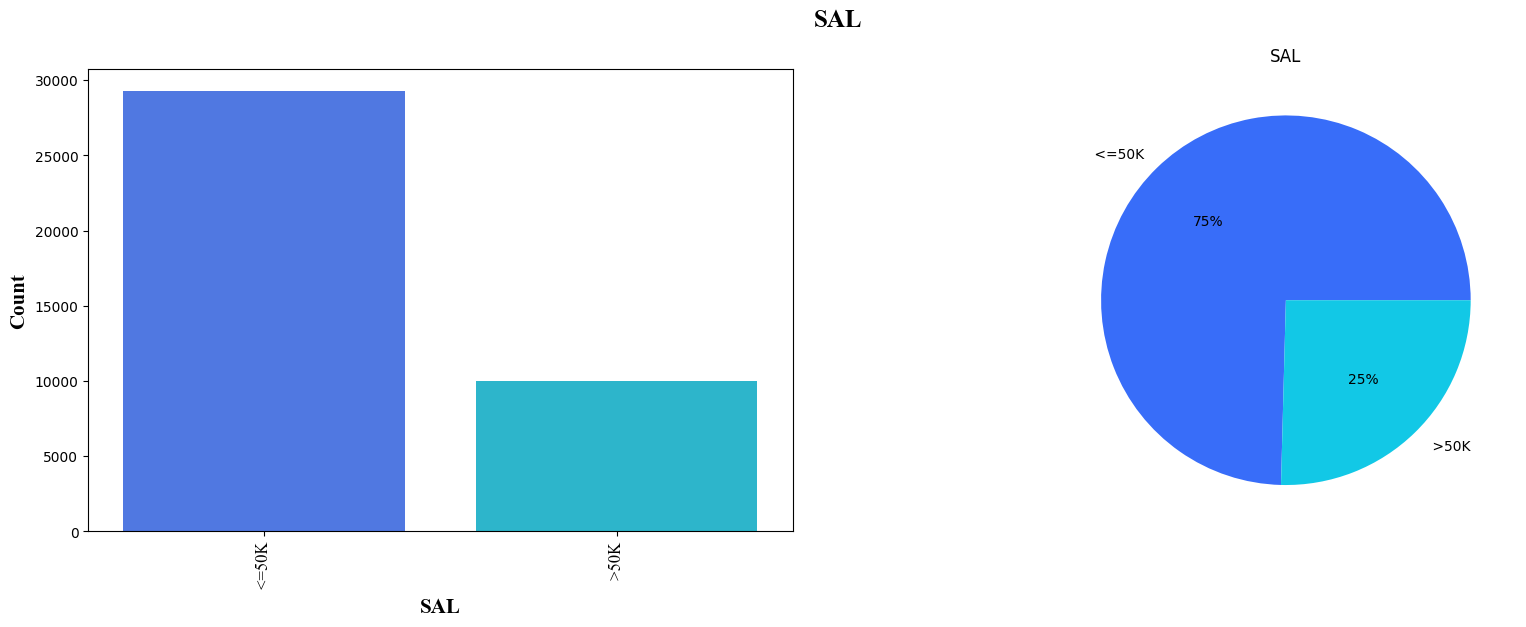

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature,color):
    plt.figure(figsize=(20,6))
    if feature != 'NATIVE':
        plt.subplot(1,2,1)
    else:
        plt.subplot(1,1,1)
    palette_color = sns.color_palette(color)
    sns.countplot(x=feature, data=data, palette = palette_color, order=data[feature].value_counts().index)
    plt.xticks(rotation = 90,fontsize = 12, fontfamily = "Times New Roman")
    plt.xlabel(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.ylabel("Count", weight='bold', fontfamily = "Times New Roman", size = '15')
    
    # Display state data in a form of Pie Graph
    if feature != 'NATIVE':
        plt.subplot(1,2,2)
        values = data[feature].value_counts().keys().tolist()
        counts = data[feature].value_counts().tolist()
        plt.pie(data[feature].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')
        plt.suptitle(feature.upper(), weight='bold', fontfamily = "Times New Roman").set_fontsize('18')

for c_cols in cat_sal_data:
    colors = ['bright','rainbow']
    color = random.choice(colors)
    plot_data(cat_sal_data,c_cols,color)
    plt.title(c_cols.upper())

In [33]:
# Showing features with more than one outlier

def get_outliers(data):
    
    outlier_indices = []
    for cols in data.columns.tolist():
        Q1 = np.percentile(data[cols], 25)  # 1st quartile (25%)
        Q3 = np.percentile(data[cols],75)      # 3rd quartile (75%)
        IQR = Q3 - Q1                       # Interquartile rrange (IQR)
        outlier_step = 1.5 * IQR            # outlier step
        
        # Getting the list of indices of features having outliers
        outlier_list_col = data[(data[cols] < Q1 - outlier_step) | (data[cols] > Q3 + outlier_step )].index
        
        # Adding the outlier indices for features to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print(f'The dataset contains {len(get_outliers(num_sal_data))} observations with more than 2 outliers') 

The dataset contains 37 observations with more than 2 outliers


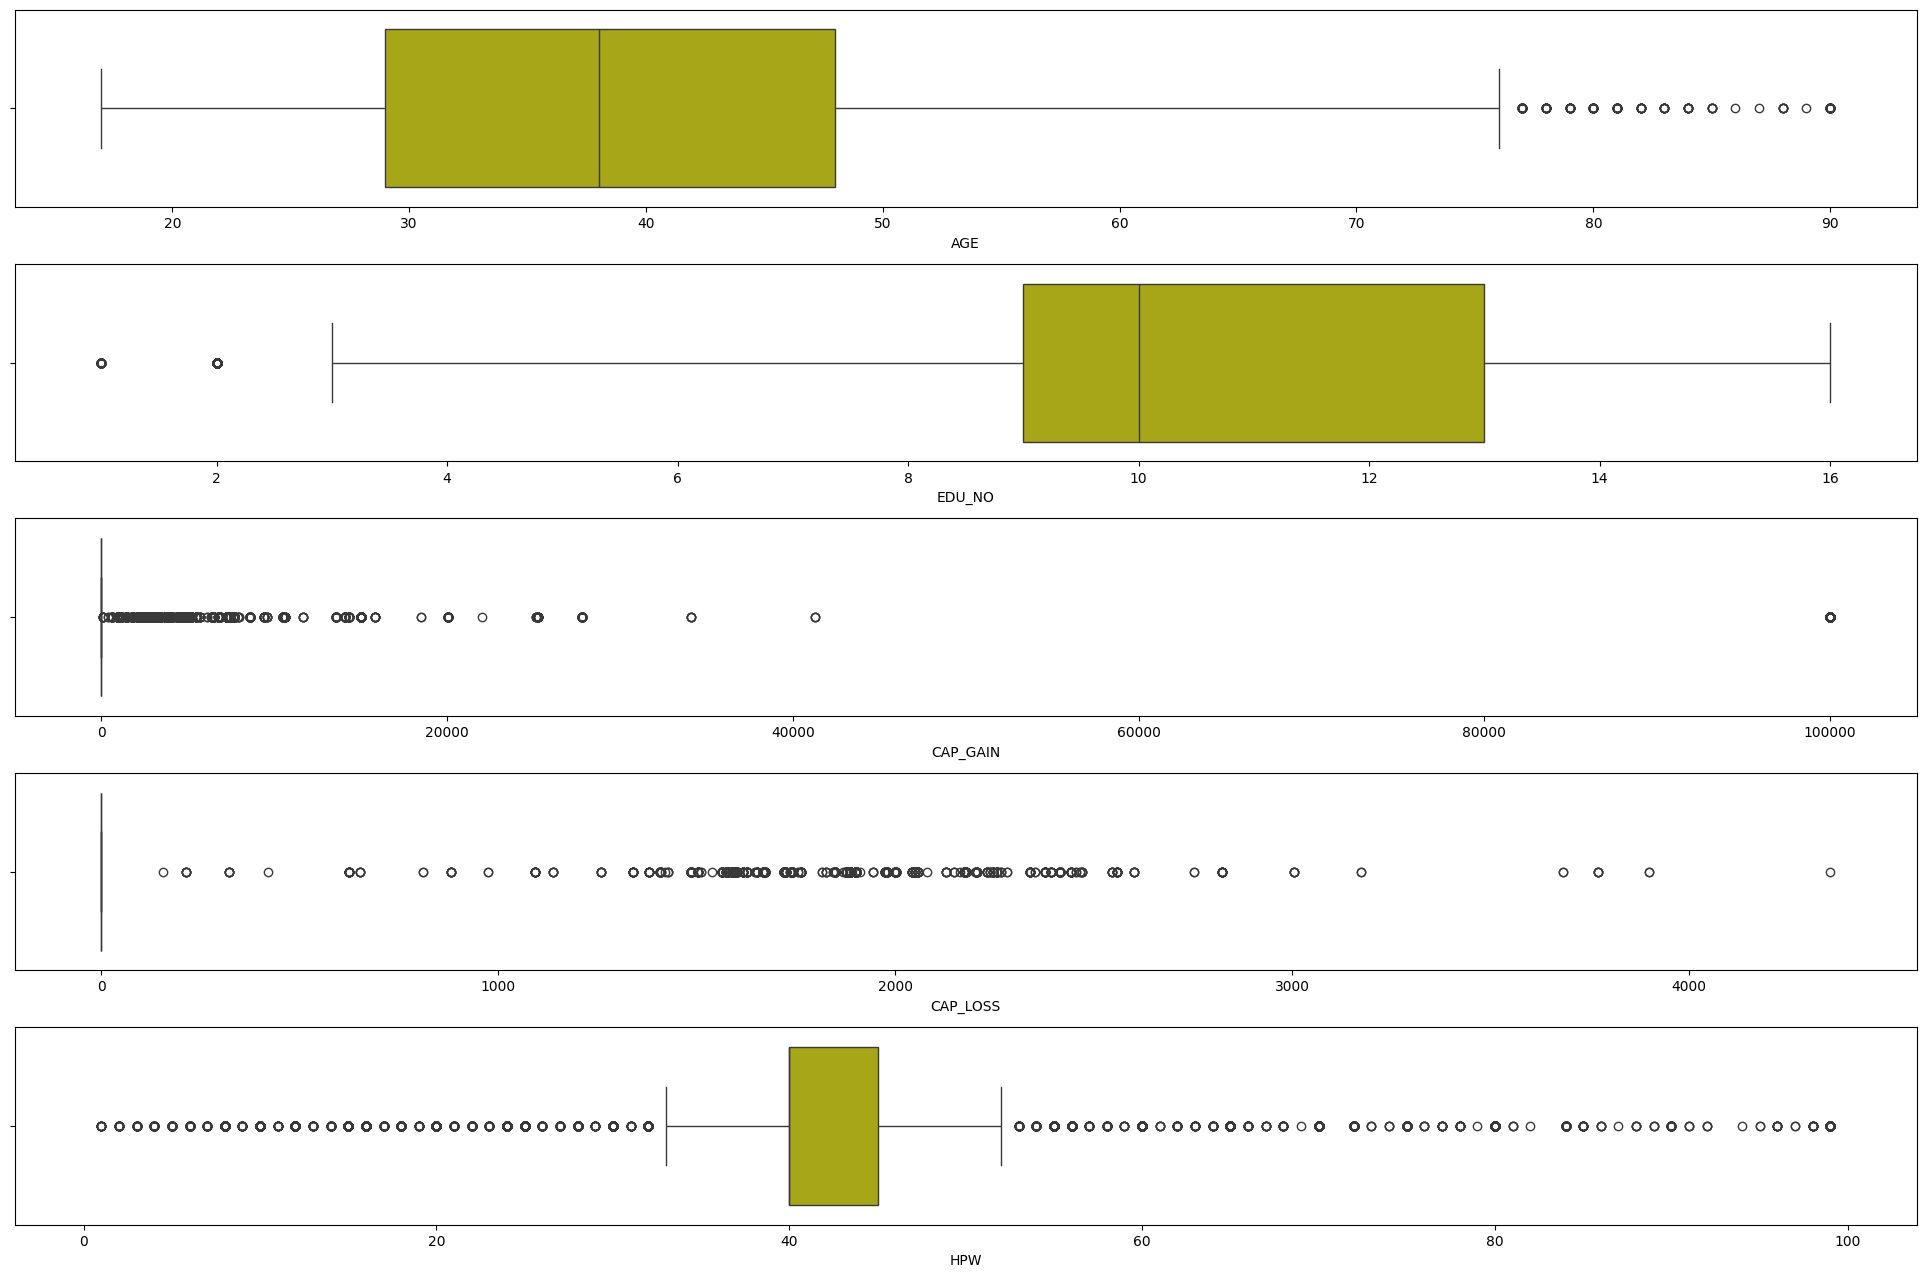

In [34]:
fig, axes=plt.subplots(5,1,figsize=(20,13),sharex=False,sharey=False)
plt.tight_layout(pad=2.0)
ax_cnt = 0
for cols in (num_sal_data):
    sns.boxplot(x=cols,data=num_sal_data,color='#bebe00',ax=axes[ax_cnt])
    ax_cnt +=1

##### **INFERENCE** #####
There are lot of outliers present in the dataframe but we should be dropping them because the numbers are large and may significantly affect the creation of the model

### **Label Encoding** ###

In [35]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for col in cat_sal_data:
  salary_data[col]= label_encoder.fit_transform(salary_data[col])

In [36]:
salary_data.head()

AGE  WCLASS  EDU  EDU_NO  MS  OCCUP  REL  RACE  SEX  CAP_GAIN  CAP_LOSS  \
0   39       5    9      13   4      0    1     4    1      2174         0   
1   50       4    9      13   2      3    0     4    1         0         0   
2   38       2   11       9   0      5    1     4    1         0         0   
3   53       2    1       7   2      5    0     2    1         0         0   
4   28       2    9      13   2      9    5     2    0         0         0   

   HPW  NATIVE  SAL  
0   40      37    0  
1   13      37    0  
2   40      37    0  
3   40      37    0  
4   40       4    0

In [37]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39239 entries, 0 to 39238
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   AGE       39239 non-null  int64
 1   WCLASS    39239 non-null  int32
 2   EDU       39239 non-null  int32
 3   EDU_NO    39239 non-null  int64
 4   MS        39239 non-null  int32
 5   OCCUP     39239 non-null  int32
 6   REL       39239 non-null  int32
 7   RACE      39239 non-null  int32
 8   SEX       39239 non-null  int32
 9   CAP_GAIN  39239 non-null  int64
 10  CAP_LOSS  39239 non-null  int64
 11  HPW       39239 non-null  int64
 12  NATIVE    39239 non-null  int32
 13  SAL       39239 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.8 MB


In [38]:
salary_data.shape

(39239, 14)

### **CORRELATION MATRIX** ###

In [39]:
salary_data.corr()

AGE    WCLASS       EDU    EDU_NO        MS     OCCUP  \
AGE       1.000000  0.079642  0.001807  0.030211 -0.233279 -0.004676   
WCLASS    0.079642  1.000000  0.022333  0.041859 -0.031786  0.016217   
EDU       0.001807  0.022333  1.000000  0.366443 -0.043411 -0.020636   
EDU_NO    0.030211  0.041859  0.366443  1.000000 -0.069475  0.087334   
MS       -0.233279 -0.031786 -0.043411 -0.069475  1.000000  0.006666   
OCCUP    -0.004676  0.016217 -0.020636  0.087334  0.006666  1.000000   
REL      -0.230643 -0.070247 -0.010764 -0.085939  0.155762 -0.061367   
RACE      0.044616  0.059339  0.003913  0.033594 -0.075430  0.008746   
SEX       0.068483  0.075331 -0.029864  0.006596 -0.109154  0.061054   
CAP_GAIN  0.075495  0.031985  0.035072  0.129552 -0.042309  0.016952   
CAP_LOSS  0.049876  0.002649  0.024082  0.082594 -0.033607  0.010978   
HPW       0.066927  0.047542  0.060431  0.136030 -0.167011  0.020983   
NATIVE    0.012129  0.010469  0.075014  0.097527 -0.026461  0.004230   
SAL       0.214285  0.015598  0.094952  0.329569 -0.181626  0.049738   

               REL      RACE       SEX  CAP_GAIN  CAP_LOSS       HPW  \
AGE      -0.230643  0.044616  0.068483  0.075495  0.049876  0.066927   
WCLASS   -0.070247  0.059339  0.075331  0.031985  0.002649  0.047542   
EDU      -0.010764  0.003913 -0.029864  0.035072  0.024082  0.060431   
EDU_NO   -0.085939  0.033594  0.006596  0.129552  0.082594  0.136030   
MS        0.155762 -0.075430 -0.109154 -0.042309 -0.033607 -0.167011   
OCCUP    -0.061367  0.008746  0.061054  0.016952  0.010978  0.020983   
REL       1.000000 -0.113604 -0.584810 -0.062712 -0.066390 -0.247737   
RACE     -0.113604  1.000000  0.085235  0.021099  0.031794  0.053968   
SEX      -0.584810  0.085235  1.000000  0.052882  0.053687  0.226747   
CAP_GAIN -0.062712  0.021099  0.052882  1.000000 -0.036791  0.082977   
CAP_LOSS -0.066390  0.031794  0.053687 -0.036791  1.000000  0.050638   
HPW      -0.247737  0.053968  0.226747  0.082977  0.050638  1.000000   
NATIVE   -0.001036  0.116142 -0.010639  0.012924  0.014576  0.013993   
SAL      -0.244911  0.078779  0.212912  0.231529  0.153263  0.221424   

            NATIVE       SAL  
AGE       0.012129  0.214285  
WCLASS    0.010469  0.015598  
EDU       0.075014  0.094952  
EDU_NO    0.097527  0.329569  
MS       -0.026461 -0.181626  
OCCUP     0.004230  0.049738  
REL      -0.001036 -0.244911  
RACE      0.116142  0.078779  
SEX      -0.010639  0.212912  
CAP_GAIN  0.012924  0.231529  
CAP_LOSS  0.014576  0.153263  
HPW       0.013993  0.221424  
NATIVE    1.000000  0.025050  
SAL       0.025050  1.000000

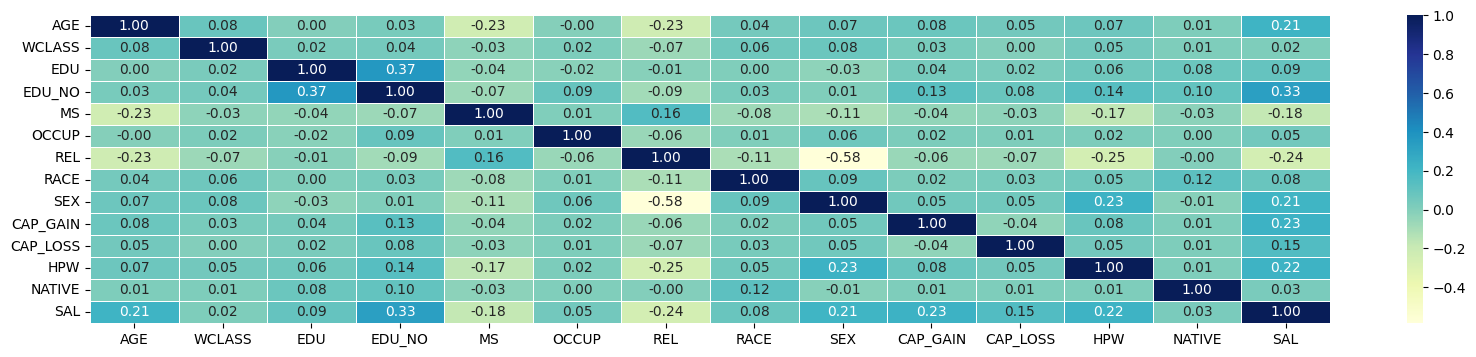

In [40]:
# Correlation Heatmap
f,ax = plt.subplots(figsize=(20,4))
sns.heatmap(salary_data.corr(), annot=True, linewidths =.5, fmt ='.2f',cmap="YlGnBu",ax=ax)
plt.show()

- There is a high negative correlation between Relationship and Sex
- There is a negative correlation between Marital status and Age
- There is a positive correlation seen between Education Number and Education
- The is a positive correlation seen between Education Number and Salary
- There is a positive correlation between Age and Salary

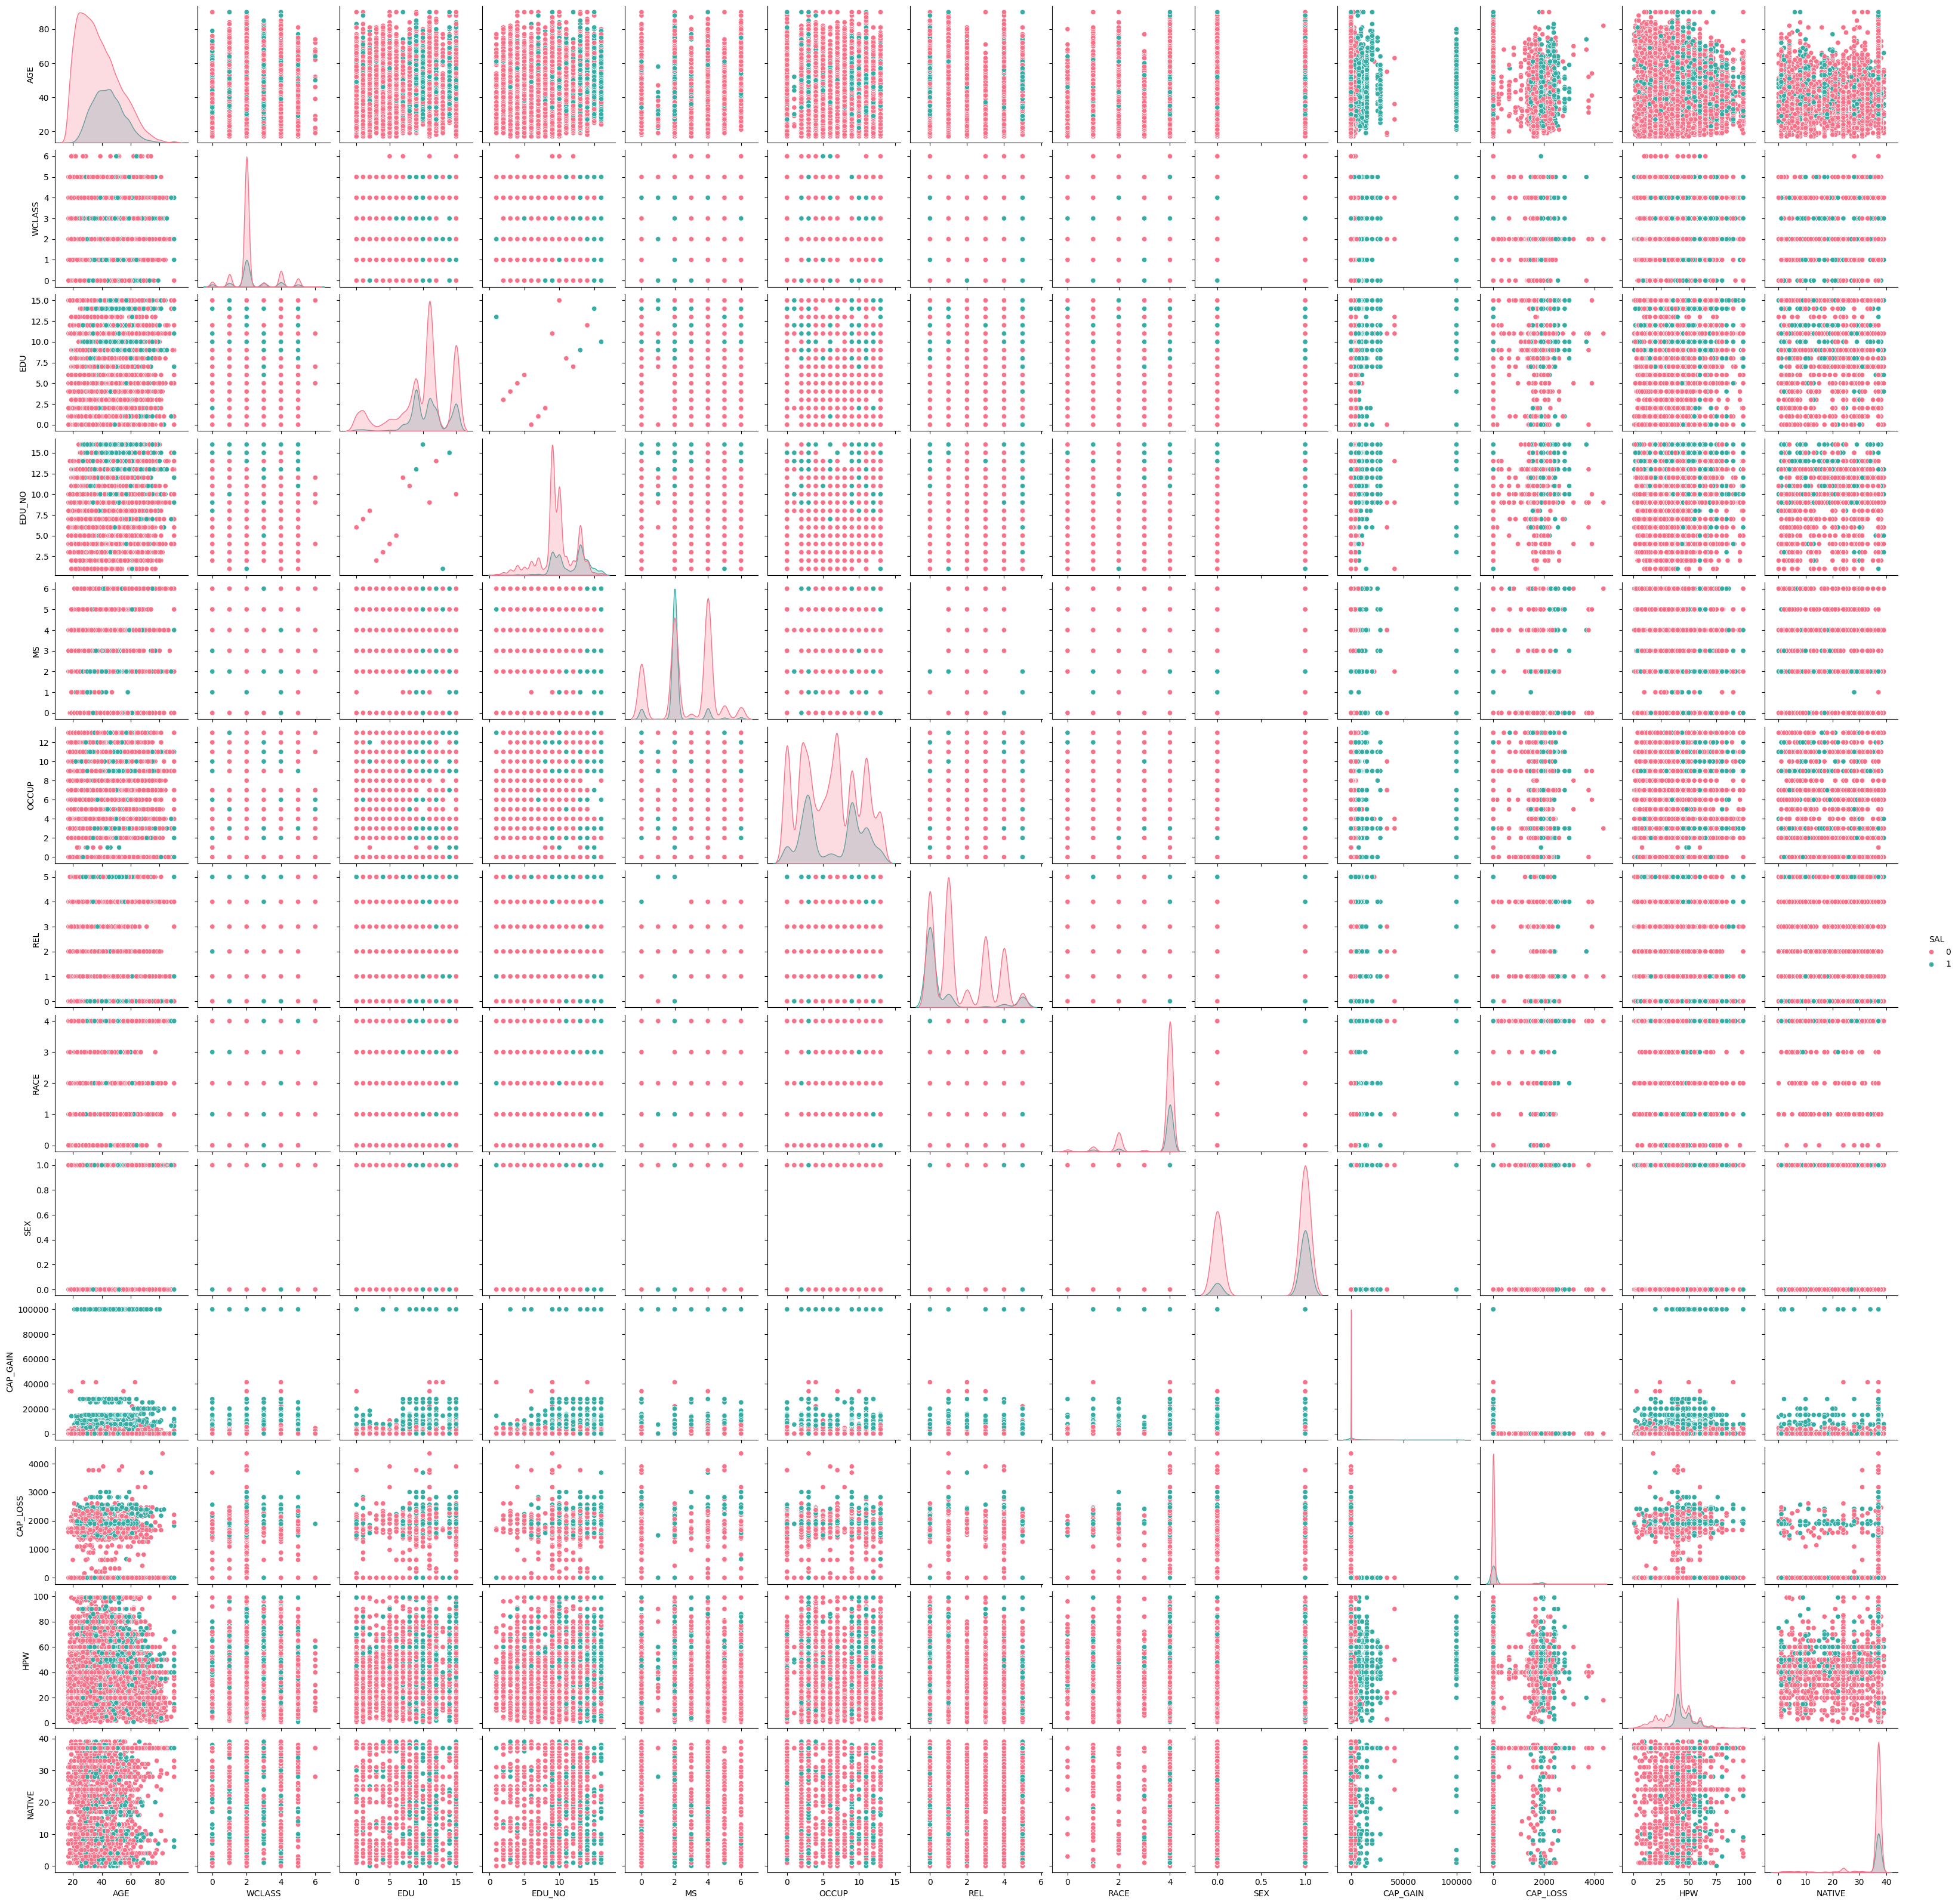

In [81]:
# Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.pairplot(salary_data, hue='SAL', palette="husl")

### ***CATEGORIZING TRAINING AND TESTING SETS*** ###

In [42]:
salary_data.head()

AGE  WCLASS  EDU  EDU_NO  MS  OCCUP  REL  RACE  SEX  CAP_GAIN  CAP_LOSS  \
0   39       5    9      13   4      0    1     4    1      2174         0   
1   50       4    9      13   2      3    0     4    1         0         0   
2   38       2   11       9   0      5    1     4    1         0         0   
3   53       2    1       7   2      5    0     2    1         0         0   
4   28       2    9      13   2      9    5     2    0         0         0   

   HPW  NATIVE  SAL  
0   40      37    0  
1   13      37    0  
2   40      37    0  
3   40      37    0  
4   40       4    0

In [43]:
data_c = salary_data.drop(['SAL'], axis=1)

In [44]:
data_c

AGE  WCLASS  EDU  EDU_NO  MS  OCCUP  REL  RACE  SEX  CAP_GAIN  \
0       39       5    9      13   4      0    1     4    1      2174   
1       50       4    9      13   2      3    0     4    1         0   
2       38       2   11       9   0      5    1     4    1         0   
3       53       2    1       7   2      5    0     2    1         0   
4       28       2    9      13   2      9    5     2    0         0   
...    ...     ...  ...     ...  ..    ...  ...   ...  ...       ...   
39234   48       1   12      14   0      7    1     4    1         0   
39235   33       2    9      13   4      9    3     4    1         0   
39236   39       2    9      13   0      9    1     4    0         0   
39237   44       2    9      13   0      0    3     1    1      5455   
39238   35       3    9      13   2      3    0     4    1         0   

       CAP_LOSS  HPW  NATIVE  
0             0   40      37  
1             0   13      37  
2             0   40      37  
3             0   40      37  
4             0   40       4  
...         ...  ...     ...  
39234         0   40      37  
39235         0   40      37  
39236         0   36      37  
39237         0   40      37  
39238         0   60      37  

[39239 rows x 13 columns]

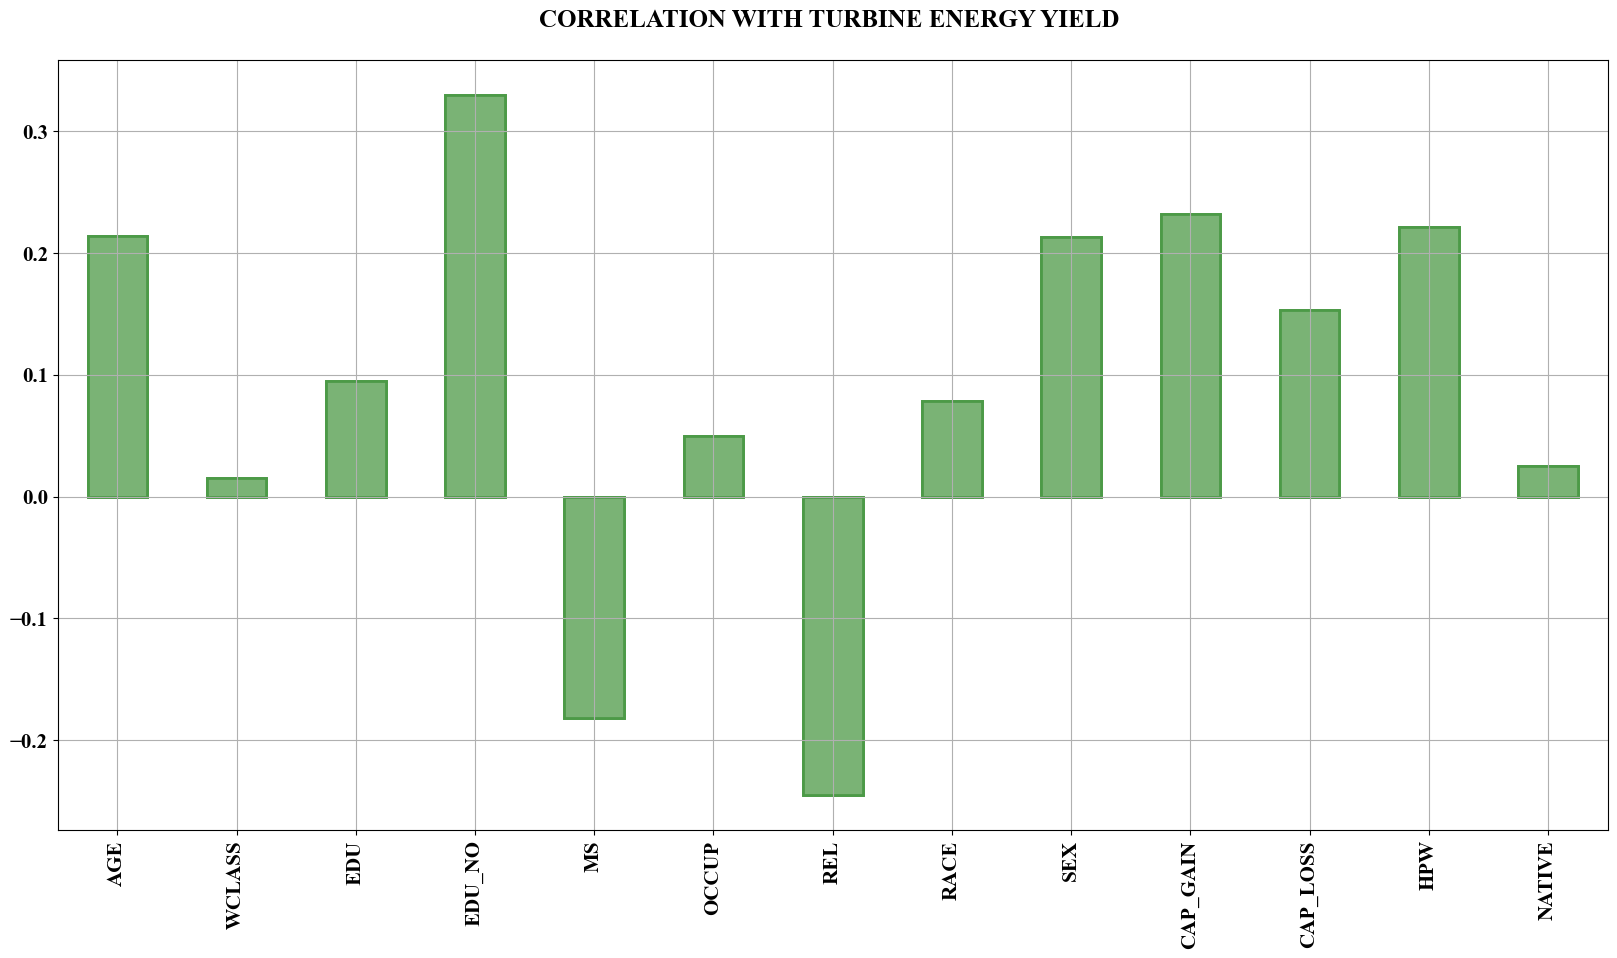

In [45]:
df=data_c.copy()
correlations = data_c.corrwith(salary_data.SAL)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize = (20, 10), fontsize = 15, color = '#7ab375', edgecolor='#4c9a47', linewidth=2, rot = 45, grid = True)
plt.title('CORRELATION WITH TURBINE ENERGY YIELD \n', horizontalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')
correlations.plot.bar(figsize = (20, 10), fontsize = 15, color = '#7ab375', edgecolor='#4c9a47', linewidth=2, rot = 45, grid = True)
plt.title('CORRELATION WITH TURBINE ENERGY YIELD \n', horizontalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')
plt.xticks(fontfamily = "Times New Roman", weight='bold', size=15, rotation=90)
plt.yticks(fontfamily = "Times New Roman", weight='bold', size=15)
plt.show()

## **Imbalanced Data** ##

In [40]:
salary_data.shape

(39239, 14)

In [41]:
# Defining x and y attributes
inputs = salary_data.drop('SAL', axis=1)
target = salary_data['SAL']

In [42]:
inputs

AGE  WCLASS  EDU  EDU_NO  MS  OCCUP  REL  RACE  SEX  CAP_GAIN  \
0       39       5    9      13   4      0    1     4    1      2174   
1       50       4    9      13   2      3    0     4    1         0   
2       38       2   11       9   0      5    1     4    1         0   
3       53       2    1       7   2      5    0     2    1         0   
4       28       2    9      13   2      9    5     2    0         0   
...    ...     ...  ...     ...  ..    ...  ...   ...  ...       ...   
39234   48       1   12      14   0      7    1     4    1         0   
39235   33       2    9      13   4      9    3     4    1         0   
39236   39       2    9      13   0      9    1     4    0         0   
39237   44       2    9      13   0      0    3     1    1      5455   
39238   35       3    9      13   2      3    0     4    1         0   

       CAP_LOSS  HPW  NATIVE  
0             0   40      37  
1             0   13      37  
2             0   40      37  
3             0   40      37  
4             0   40       4  
...         ...  ...     ...  
39234         0   40      37  
39235         0   40      37  
39236         0   36      37  
39237         0   40      37  
39238         0   60      37  

[39239 rows x 13 columns]

In [43]:
target

0        0
1        0
2        0
3        0
4        0
        ..
39234    0
39235    0
39236    0
39237    0
39238    1
Name: SAL, Length: 39239, dtype: int32

### ***Categorizing the imbalanced data to Training and Testing Sets with testing sample size as 30%*** ###

In [44]:
# Splitting x and y into training and testing sets, testing sample size being 30%

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.3,random_state=1,stratify=target)

In [45]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (27467, 13)
Shape of x_test:  (11772, 13)
Shape of y_train:  (27467,)
Shape of y_test:  (11772,)


In [46]:
# Summarizing train and test composition
from collections import Counter
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 20485, 1: 6982}) Testing Data Counter({0: 8779, 1: 2993})


### ***Function to get all the details for Accuracy, Classification Report and Confustion Matrix*** ###

In [47]:
# Function to get all the metrics like Accuracy Score, ROC_AUC, Classification Report and Confusion Matrix
# based on the classification model, train and test x and y values
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        classify_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("\n**********************************************************")
        print("                  TRAINING RESULT\n**********************************************************\n")
        print(f"ACCURACY: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"CLASSIFICATION REPORT:\n{classify_report}")
        print("\n____________________________________________________________________\n")
        print(f"CONFUSION MATRIX: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        classify_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("\n**********************************************************")
        print("                  TESTING RESULT\n**********************************************************\n")        
        print(f"ACCURACY: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"CLASSIFICATION REPORT:\n{classify_report}")
        print("\n____________________________________________________________________\n")
        print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")

### **Training the Model SVM with default hyperparameters** ###

In [54]:
# Preparing a SVC model on training data set with default values and without normalization
from sklearn.svm import SVC
from sklearn import tree, preprocessing, metrics
model_d = SVC()
model_d.fit(x_train, y_train)

print_score(model_d, x_train, y_train, x_test, y_test, train=True)
print_score(model_d, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 79.51%

____________________________________________________________________

CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.801559     0.738624  0.795063      0.770092      0.785561
recall         0.963827     0.299914  0.795063      0.631871      0.795063
f1-score       0.875235     0.426607  0.795063      0.650921      0.761196
support    20485.000000  6982.000000  0.795063  27467.000000  27467.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[19744   741]
 [ 4888  2094]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 79.61%

__________________________________________________________________

##### **INFERENCE** #####
- The best accuracy is for the default SVM model is 79.51%
- As a result of the imbalance in the target dataset,the results are biased towards the majority class.
- This will classify the target majority classes correctly but will fail to classify the target minority classes.
- We will need to use some kind of oversampling techniques to balance the dataset.

### **NORMALIZING THE DATA** ###

In [48]:
columns = salary_data.columns
columns

Index(['AGE', 'WCLASS', 'EDU', 'EDU_NO', 'MS', 'OCCUP', 'REL', 'RACE', 'SEX',
       'CAP_GAIN', 'CAP_LOSS', 'HPW', 'NATIVE', 'SAL'],
      dtype='object')

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(salary_data)

MinMaxScaler()

In [50]:
sal_data = pd.DataFrame()
sal_data[columns] = scaler.transform(salary_data[columns])

In [51]:
sal_data

AGE    WCLASS       EDU    EDU_NO        MS     OCCUP  REL  RACE  \
0      0.301370  0.833333  0.600000  0.800000  0.666667  0.000000  0.2  1.00   
1      0.452055  0.666667  0.600000  0.800000  0.333333  0.230769  0.0  1.00   
2      0.287671  0.333333  0.733333  0.533333  0.000000  0.384615  0.2  1.00   
3      0.493151  0.333333  0.066667  0.400000  0.333333  0.384615  0.0  0.50   
4      0.150685  0.333333  0.600000  0.800000  0.333333  0.692308  1.0  0.50   
...         ...       ...       ...       ...       ...       ...  ...   ...   
39234  0.424658  0.166667  0.800000  0.866667  0.000000  0.538462  0.2  1.00   
39235  0.219178  0.333333  0.600000  0.800000  0.666667  0.692308  0.6  1.00   
39236  0.301370  0.333333  0.600000  0.800000  0.000000  0.692308  0.2  1.00   
39237  0.369863  0.333333  0.600000  0.800000  0.000000  0.000000  0.6  0.25   
39238  0.246575  0.500000  0.600000  0.800000  0.333333  0.230769  0.0  1.00   

       SEX  CAP_GAIN  CAP_LOSS       HPW    NATIVE  SAL  
0      1.0  0.021740       0.0  0.397959  0.948718  0.0  
1      1.0  0.000000       0.0  0.122449  0.948718  0.0  
2      1.0  0.000000       0.0  0.397959  0.948718  0.0  
3      1.0  0.000000       0.0  0.397959  0.948718  0.0  
4      0.0  0.000000       0.0  0.397959  0.102564  0.0  
...    ...       ...       ...       ...       ...  ...  
39234  1.0  0.000000       0.0  0.397959  0.948718  0.0  
39235  1.0  0.000000       0.0  0.397959  0.948718  0.0  
39236  0.0  0.000000       0.0  0.357143  0.948718  0.0  
39237  1.0  0.054551       0.0  0.397959  0.948718  0.0  
39238  1.0  0.000000       0.0  0.602041  0.948718  1.0  

[39239 rows x 14 columns]

In [52]:
x = sal_data.drop(['SAL'],axis=1).copy()
y = sal_data.SAL

In [53]:
x

AGE    WCLASS       EDU    EDU_NO        MS     OCCUP  REL  RACE  \
0      0.301370  0.833333  0.600000  0.800000  0.666667  0.000000  0.2  1.00   
1      0.452055  0.666667  0.600000  0.800000  0.333333  0.230769  0.0  1.00   
2      0.287671  0.333333  0.733333  0.533333  0.000000  0.384615  0.2  1.00   
3      0.493151  0.333333  0.066667  0.400000  0.333333  0.384615  0.0  0.50   
4      0.150685  0.333333  0.600000  0.800000  0.333333  0.692308  1.0  0.50   
...         ...       ...       ...       ...       ...       ...  ...   ...   
39234  0.424658  0.166667  0.800000  0.866667  0.000000  0.538462  0.2  1.00   
39235  0.219178  0.333333  0.600000  0.800000  0.666667  0.692308  0.6  1.00   
39236  0.301370  0.333333  0.600000  0.800000  0.000000  0.692308  0.2  1.00   
39237  0.369863  0.333333  0.600000  0.800000  0.000000  0.000000  0.6  0.25   
39238  0.246575  0.500000  0.600000  0.800000  0.333333  0.230769  0.0  1.00   

       SEX  CAP_GAIN  CAP_LOSS       HPW    NATIVE  
0      1.0  0.021740       0.0  0.397959  0.948718  
1      1.0  0.000000       0.0  0.122449  0.948718  
2      1.0  0.000000       0.0  0.397959  0.948718  
3      1.0  0.000000       0.0  0.397959  0.948718  
4      0.0  0.000000       0.0  0.397959  0.102564  
...    ...       ...       ...       ...       ...  
39234  1.0  0.000000       0.0  0.397959  0.948718  
39235  1.0  0.000000       0.0  0.397959  0.948718  
39236  0.0  0.000000       0.0  0.357143  0.948718  
39237  1.0  0.054551       0.0  0.397959  0.948718  
39238  1.0  0.000000       0.0  0.602041  0.948718  

[39239 rows x 13 columns]

In [54]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39234    0.0
39235    0.0
39236    0.0
39237    0.0
39238    1.0
Name: SAL, Length: 39239, dtype: float64

### ***Categorizing the imbalanced data to Training and Testing Sets with testing sample size as 30%*** ###

In [55]:
# Splitting x and y into training and testing sets, testing sample size being 30%

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [56]:
print("Shape of x_train_d: ",x_train.shape)
print("Shape of x_test_d: ", x_test.shape)
print("Shape of y_train_d: ",y_train.shape)
print("Shape of y_test_d: ",y_test.shape)

Shape of x_train_d:  (27467, 13)
Shape of x_test_d:  (11772, 13)
Shape of y_train_d:  (27467,)
Shape of y_test_d:  (11772,)


In [57]:
# Summarizing train and test composition
from collections import Counter
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0.0: 20485, 1.0: 6982}) Testing Data Counter({0.0: 8779, 1.0: 2993})


### **BALANCING THE DATA** ###

In [58]:
y.value_counts()

SAL
0.0    29264
1.0     9975
Name: count, dtype: int64

### **SMOTE: Synthetic Minority Oversampling Technique** ###

In [59]:
# Using SMOTE to balance the data using Oversampling technique. 

from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0.0: 20485, 1.0: 6982})
After Counter({0.0: 20485, 1.0: 20485})


In [60]:
y_train_sm.value_counts()
# After applying SMOTE, the counts have balanced for the training count of 378 records, which is 80% of the total 600 records.
# We now see that "Good: 0" and , "Low: 0" and "Risky: 1", all have the same count of records i.e., 378

SAL
0.0    20485
1.0    20485
Name: count, dtype: int64

### **ADASYN: Adaptive Synthetic Sampling Approach** ###

In [61]:
# Using ADASYN to balance the data using Oversampling technique. 
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0.0: 20485, 1.0: 6982})
After Counter({1.0: 20852, 0.0: 20485})


### **Hybridization: SMOTE + Tomek Links** ###

In [62]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0.0: 20485, 1.0: 6982})
After Counter({0.0: 19764, 1.0: 19764})


### **Hybridization: SMOTE + ENN** ###

In [63]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0.0: 20485, 1.0: 6982})
After Counter({1.0: 14595, 0.0: 14023})


### **Analyzing the Performance after Oversampling to Balance the target class** ###

#### ***Function to get all the necessary metrics*** ####

*Function to get - confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided*

In [64]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

# Function to give the confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided

def test_eval(clf_model, x_test, y_test, algo=None, sampling=None):
    
    # Getting the Prediction probability and prediction values for Test Set
    y_prob=clf_model.predict_proba(x_test)
    y_pred=clf_model.predict(x_test)
    print('_'*60)
    print('\nCONFUSION MATRIX')
    print(confusion_matrix(y_test,y_pred))
    print('_'*60)
    
    # Calculating the Accuracy
    diag_f = np.trace(confusion_matrix(y_test,y_pred))
    total_f = sum(sum(confusion_matrix(y_test,y_pred)))
    maccs_f = diag_f/total_f
    print(f"\nACCURACY: {maccs_f}\n") 

    # Calculating the ROC_AUC
    from sklearn.tree import DecisionTreeClassifier
    roc_auc_f = metrics.roc_auc_score(y_test, clf_model.predict_proba(x_test)[:, 1])
    print(f"ROC_AUC: {roc_auc_f}\n")
    print('_'*60)


    print(f"\nCLASSIFICATION REPORT")
    print('-'*60)
    print(classification_report(y_test,y_pred))
    print('-'*60)
    print('_'*60)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
          
    
    return algo,precision,recall,f1,sampling

In [65]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [66]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)  
    #plt.show() 
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
    
    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')
          
    
    return algo,precision,recall,f1,sampling

In [67]:
model_params = {

    'SVC' : {
        'model' : SVC(probability=True),
        'params' :[ {'C':[1], 'kernel':['linear']}]
    }
}

In [75]:
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='accuracy', n_jobs=-1, verbose=3 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
SVC with ACTUAL
Confusion Matrix
[[8553  226]
 [2049  944]] 

Classification Report
              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      8779
         1.0       0.81      0.32      0.45      2993

    accuracy                           0.81     11772
   macro avg       0.81      0.64      0.67     11772
weighted avg       0.81      0.81      0.77     11772
 

AUC-ROC
0.8355399223468116
Fitting 5 folds for each of 1 candidates, totalling 5 fits
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
SVC with SMOTE
Confusion Matrix
[[6560 2219]
 [ 698 2295]] 

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      8779
         1.0       0.51      0.77      0.61      2993

    accuracy                           0.75     11772
   macro avg       0.71      0.76      0.71     11772
weighted avg       0.80 

**SMOTE_TOMEK gives us the best accuracy and therefore we will go with this one.**

In [68]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0.0: 20485, 1.0: 6982})
After Counter({0.0: 19764, 1.0: 19764})


In [69]:
x_train,x_test,y_train,y_test = train_test_split(x_train_smtom,y_train_smtom,test_size=0.3,random_state=1, stratify=y_train_smtom)

counter = Counter(y_train_smtom)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({0.0: 19764, 1.0: 19764})
After Counter({0.0: 13835, 1.0: 13834})
Shape of X_train:  (27669, 13)
Shape of X_test:  (11859, 13)
Shape of y_train:  (27669,)
Shape of y_test (11859,)


### **MACHINE LEARNING: CLASSIFICATION** ###

#### ***KERNEL TRICK*** ####
- Linear kernel
- Polynomial kernel
- Radial Basis Function (RBF) kernel
- Sigmoid kernel

#### ***Sklearn Support Vector Classifier Default*** ####

In [157]:
# C=1.0, kernel='rbf', gama='scale'
model_rbf_d = SVC() # default kernel='rbf'
model_rbf_d.fit(x_train, y_train)
model_rbf_d.score(x_test,y_test)

0.8280630744582174

In [158]:
print_score(model_rbf_d, x_train, y_train, x_test, y_test, train=True)
print_score(model_rbf_d, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 83.32%

____________________________________________________________________

CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.866630      0.805366  0.833207      0.835998      0.835999
recall         0.787640      0.878777  0.833207      0.833208      0.833207
f1-score       0.825249      0.840471  0.833207      0.832860      0.832860
support    13835.000000  13834.000000  0.833207  27669.000000  27669.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[10897  2938]
 [ 1677 12157]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 82.81%

_____________________________________________________________

#### ***Sklearn Support Vector Classifier Using Linear Kernel*** ####

In [165]:
# C=1.0, kernel='linear', gama='scale'
model_linear_d = SVC(kernel='linear')
model_linear_d.fit(x_train, y_train)
model_linear_d.score(x_test,y_test)

0.7735896787250189

In [166]:
print_score(model_linear_d, x_train, y_train, x_test, y_test, train=True)
print_score(model_linear_d, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 78.35%

____________________________________________________________________

CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.791614      0.775848  0.783512      0.783731      0.783731
recall         0.769642      0.797383  0.783512      0.783513      0.783512
f1-score       0.780474      0.786468  0.783512      0.783471      0.783471
support    13835.000000  13834.000000  0.783512  27669.000000  27669.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[10648  3187]
 [ 2803 11031]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 77.36%

_____________________________________________________________

#### ***Sklearn Support Vector Classifier Using Sigmoid Kernel*** ####

In [161]:
# C=1.0, kernel='sigmoid', gama='scale'
model_sigmoid_d = SVC(kernel='sigmoid')
model_sigmoid_d.fit(x_train, y_train)
model_sigmoid_d.score(x_test,y_test)

0.42052449616325155

In [162]:
print_score(model_sigmoid_d, x_train, y_train, x_test, y_test, train=True)
print_score(model_sigmoid_d, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 41.50%

____________________________________________________________________

CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.415083      0.414943  0.415013      0.415013      0.415013
recall         0.415323      0.414703  0.415013      0.415013      0.415013
f1-score       0.415203      0.414823  0.415013      0.415013      0.415013
support    13835.000000  13834.000000  0.415013  27669.000000  27669.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[5746 8089]
 [8097 5737]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 42.05%

_________________________________________________________________

#### ***Sklearn Support Vector Classifier Using Polynomial Kernel*** ####

In [163]:
# C=1.0, kernel='poly', gama='scale'
model_poly_d = SVC(kernel='poly')
model_poly_d.fit(x_train, y_train)
model_poly_d.score(x_test,y_test)

0.8321949574163083

In [164]:
print_score(model_poly_d, x_train, y_train, x_test, y_test, train=True)
print_score(model_poly_d, x_train, y_train, x_test, y_test, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 83.46%

____________________________________________________________________

CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.865882      0.808271  0.834616      0.837076      0.837077
recall         0.791905      0.877331  0.834616      0.834618      0.834616
f1-score       0.827243      0.841386  0.834616      0.834315      0.834314
support    13835.000000  13834.000000  0.834616  27669.000000  27669.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[10956  2879]
 [ 1697 12137]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 83.22%

_____________________________________________________________

### **USING GRID SEARCH CV** ###

#### ***Sklearn Support Vector Classifier Default - rbf*** ####

In [167]:
mod_rbf = SVC()
param_grid_rbf = [{'kernel':['rbf'], 'gamma': [50,5,0.5], 'C':[10,0.1,0.01]}]
grid_model_rbf = GridSearchCV(mod_rbf,param_grid_rbf,cv=5,verbose=3)
grid_model_rbf.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=10, gamma=50, kernel=rbf;, score=0.870 total time= 2.0min
[CV 2/5] END ........C=10, gamma=50, kernel=rbf;, score=0.879 total time= 1.6min
[CV 3/5] END ........C=10, gamma=50, kernel=rbf;, score=0.867 total time= 1.8min
[CV 4/5] END ........C=10, gamma=50, kernel=rbf;, score=0.878 total time= 1.8min
[CV 5/5] END ........C=10, gamma=50, kernel=rbf;, score=0.874 total time= 1.8min
[CV 1/5] END .........C=10, gamma=5, kernel=rbf;, score=0.863 total time=  44.0s
[CV 2/5] END .........C=10, gamma=5, kernel=rbf;, score=0.867 total time=  42.6s
[CV 3/5] END .........C=10, gamma=5, kernel=rbf;, score=0.861 total time=  42.2s
[CV 4/5] END .........C=10, gamma=5, kernel=rbf;, score=0.864 total time=  42.5s
[CV 5/5] END .........C=10, gamma=5, kernel=rbf;, score=0.864 total time=  42.3s
[CV 1/5] END .......C=10, gamma=0.5, kernel=rbf;, score=0.838 total time=  30.6s
[CV 2/5] END .......C=10, gamma=0.5, kernel=rbf;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.01], 'gamma': [50, 5, 0.5],
                          'kernel': ['rbf']}],
             verbose=3)

In [173]:
grid_rbf_best = grid_model_rbf.best_estimator_
print(f'Best Estimator is: {grid_model_rbf.best_estimator_}')
print(f'Best Parameter is: {grid_model_rbf.best_params_}')
print(f'Best Score is: {grid_model_rbf.best_score_}')
print_score(grid_rbf_best, x_train, y_train, x_test, y_test, train=True)
print_score(grid_rbf_best, x_train, y_train, x_test, y_test, train=False)

Best Estimator is: SVC(C=10, gamma=50)
Best Parameter is: {'C': 10, 'gamma': 50, 'kernel': 'rbf'}
Best Score is: 0.8736492174854412

**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 96.00%

____________________________________________________________________

CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.986396      0.936304  0.959991      0.961350      0.961351
recall         0.932851      0.987133  0.959991      0.959992      0.959991
f1-score       0.958877      0.961047  0.959991      0.959962      0.959962
support    13835.000000  13834.000000  0.959991  27669.000000  27669.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[12906   929]
 [  178 13656]]


**********************************************************
                  TESTING RESULT
*******

#### ***Sklearn Support Vector Classifier Using Linear Kernel*** ####

In [174]:
mod_linear = SVC()
param_grid_linear = [{'kernel':['linear'], 'gamma': [40,5,0.5], 'C':[10,0.1,0.01]}]
grid_model_linear = GridSearchCV(mod_linear,param_grid_linear,cv=5,verbose=3)
grid_model_linear.fit(x_train, y_train)
grid_linear_best = grid_model_linear.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....C=10, gamma=40, kernel=linear;, score=0.778 total time=  23.2s
[CV 2/5] END .....C=10, gamma=40, kernel=linear;, score=0.779 total time=  23.9s
[CV 3/5] END .....C=10, gamma=40, kernel=linear;, score=0.783 total time=  24.0s
[CV 4/5] END .....C=10, gamma=40, kernel=linear;, score=0.791 total time=  22.6s
[CV 5/5] END .....C=10, gamma=40, kernel=linear;, score=0.787 total time=  22.3s
[CV 1/5] END ......C=10, gamma=5, kernel=linear;, score=0.778 total time=  22.0s
[CV 2/5] END ......C=10, gamma=5, kernel=linear;, score=0.779 total time=  21.8s
[CV 3/5] END ......C=10, gamma=5, kernel=linear;, score=0.783 total time=  21.7s
[CV 4/5] END ......C=10, gamma=5, kernel=linear;, score=0.791 total time=  22.3s
[CV 5/5] END ......C=10, gamma=5, kernel=linear;, score=0.787 total time=  23.1s
[CV 1/5] END ....C=10, gamma=0.5, kernel=linear;, score=0.778 total time=  22.3s
[CV 2/5] END ....C=10, gamma=0.5, kernel=linear;,

In [175]:
grid_linear_best = grid_model_linear.best_estimator_
print(f'Best Estimator is: {grid_model_linear.best_estimator_}')
print(f'Best Parameter is: {grid_model_linear.best_params_}')
print(f'Best Score is: {grid_model_linear.best_score_}')
print_score(grid_linear_best, x_train, y_train, x_test, y_test, train=True)
print_score(grid_linear_best, x_train, y_train, x_test, y_test, train=False)

Best Estimator is: SVC(C=10, gamma=40, kernel='linear')
Best Parameter is: {'C': 10, 'gamma': 40, 'kernel': 'linear'}
Best Score is: 0.7838376254285568

**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 78.46%

____________________________________________________________________

CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.789516      0.779910  0.784633      0.784713      0.784714
recall         0.776220      0.793046  0.784633      0.784633      0.784633
f1-score       0.782812      0.786423  0.784633      0.784617      0.784617
support    13835.000000  13834.000000  0.784633  27669.000000  27669.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[10739  3096]
 [ 2863 10971]]


**********************************************************
                  TE

#### ***Sklearn Support Vector Classifier Using Sigmoid Kernel*** ####

In [70]:
mod_sigmoid = SVC()
param_grid_sigmoid = [{'kernel':['sigmoid'], 'gamma': [50,5,0.5], 'C':[10,0.1,0.01]}]
grid_model_sigmoid = GridSearchCV(mod_sigmoid,param_grid_sigmoid,cv=5,verbose=3)
grid_model_sigmoid.fit(x_train, y_train)
grid_sigmoid_best = grid_model_sigmoid.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....C=10, gamma=50, kernel=sigmoid;, score=0.500 total time=  34.6s
[CV 2/5] END ....C=10, gamma=50, kernel=sigmoid;, score=0.500 total time=  38.3s
[CV 3/5] END ....C=10, gamma=50, kernel=sigmoid;, score=0.500 total time=  35.1s
[CV 4/5] END ....C=10, gamma=50, kernel=sigmoid;, score=0.500 total time=  33.0s
[CV 5/5] END ....C=10, gamma=50, kernel=sigmoid;, score=0.500 total time=  41.4s
[CV 1/5] END .....C=10, gamma=5, kernel=sigmoid;, score=0.499 total time= 1.3min
[CV 2/5] END .....C=10, gamma=5, kernel=sigmoid;, score=0.499 total time=  58.7s
[CV 3/5] END .....C=10, gamma=5, kernel=sigmoid;, score=0.499 total time= 1.0min
[CV 4/5] END .....C=10, gamma=5, kernel=sigmoid;, score=0.500 total time=  43.3s
[CV 5/5] END .....C=10, gamma=5, kernel=sigmoid;, score=0.500 total time=  39.8s
[CV 1/5] END ...C=10, gamma=0.5, kernel=sigmoid;, score=0.429 total time=  25.2s
[CV 2/5] END ...C=10, gamma=0.5, kernel=sigmoid;,

In [74]:
grid_sigmoid_best = grid_model_sigmoid.best_estimator_
print(f'Best Estimator is: {grid_model_sigmoid.best_estimator_}')
print(f'Best Parameter is: {grid_model_sigmoid.best_params_}')
print(f'Best Score is: {grid_model_sigmoid.best_score_}')
print_score(grid_sigmoid_best, x_train, y_train, x_test, y_test, train=True)
print_score(grid_sigmoid_best, x_train, y_train, x_test, y_test, train=False)

Best Estimator is: SVC(C=0.01, gamma=0.5, kernel='sigmoid')
Best Parameter is: {'C': 0.01, 'gamma': 0.5, 'kernel': 'sigmoid'}
Best Score is: 0.5128480031530109

**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 50.12%

____________________________________________________________________

CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.500957      0.501534  0.501175      0.501246      0.501246
recall         0.624286      0.378054  0.501175      0.501170      0.501175
f1-score       0.555863      0.431127  0.501175      0.493495      0.493497
support    13835.000000  13834.000000  0.501175  27669.000000  27669.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[8637 5198]
 [8604 5230]]


**********************************************************
                

#### ***Sklearn Support Vector Classifier Using Polynomial Kernel*** ####

In [70]:
mod_poly = SVC()
param_grid_poly = [{'kernel':['poly'], 'gamma': [1], 'C':[1000]}]
grid_model_poly = GridSearchCV(mod_poly,param_grid_poly,cv=2,verbose=3)
grid_model_poly.fit(x_train, y_train)
grid_poly_best = grid_model_poly.best_estimator_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END ......C=1000, gamma=1, kernel=poly;, score=0.833 total time=93.2min
[CV 2/2] END ......C=1000, gamma=1, kernel=poly;, score=0.831 total time=86.7min


In [ ]:
grid_poly_best = grid_model_poly.best_estimator_
print(f'Best Estimator is: {grid_model_poly.best_estimator_}')
print(f'Best Parameter is: {grid_model_poly.best_params_}')
print(f'Best Score is: {grid_model_poly.best_score_}')
print_score(grid_poly_best, x_train, y_train, x_test, y_test, train=True)
print_score(grid_poly_best, x_train, y_train, x_test, y_test, train=False)

In [ ]:
grid_poly_best = SVC(random_state=42)

svc_param_grid = {'kernel': ['poly'], 
                  'gamma': [1],
                  'C': [1000],
                  'tol':[0.001]}

best_SVM = GridSearchCV(grid_poly_best, param_grid = svc_param_grid, cv = 2, scoring = "accuracy", n_jobs = 6, verbose = 3)

best_SVM.fit(x_train,y_train)

svm_best = best_SVM.best_estimator_

best_SVM.best_score_

**The Polynomial Kernel gives the highest accuracy out of all the options available.**